# CSE 6730 Project

## Setup

In [ ]:
import os
import time
from enum import IntEnum
import sys

import numpy as np
import random
import math
from matplotlib import pyplot as plt
from matplotlib import colors

!pip install GenProcTrees
import GenProcTrees as gpt
import PIL
from PIL import Image
from matplotlib import cm
import imageio

In [ ]:
class Color():
  red = [253, 102, 102]
  green = [102, 255, 102]
  moss = [16, 128, 65]
  blue = [102, 204, 255]
  bubblegum = [252, 102, 255]
  orchid = [102, 102, 255]
  orange = [254, 204, 102]
  yellow = [255, 255, 102]
  lavendar = [204, 102, 255]
  carnation = [253, 111, 208]
  black = [0, 0, 0]
  white = [255, 255, 255]
  
  brown = [139, 69, 19]

In [ ]:
# enums behave kinda weird in python
# class State(IntEnum):
class State():
  EMPTY = 0
  HEALTHY = 1
  INFECTED = 2
  DEAD = 3
  BARRIER_CELL = 4
  WALL_CELL = 5
  AIRBORNE_INFECTED = 6
  AIRBORNE_DEAD = 7

  def values():
    return np.array([State.EMPTY, State.HEALTHY, State.INFECTED, State.DEAD, 
                     State.BARRIER_CELL, State.WALL_CELL, State.AIRBORNE_INFECTED, State.AIRBORNE_DEAD])
  
  def colormap():
    cm = dict()
    cm[State.EMPTY] = Color.blue
    cm[State.HEALTHY] = Color.brown
    cm[State.INFECTED] = Color.yellow
    cm[State.DEAD] = Color.red
    cm[State.BARRIER_CELL] = Color.lavendar
    cm[State.WALL_CELL] = Color.white
    cm[State.AIRBORNE_INFECTED] = Color.orchid
    cm[State.AIRBORNE_DEAD] = Color.black

    return cm

## Hyper Parameters
Results are stored in the `results` folder. An animtation of the results can be found in the `gifs` folder.

`num_trees` is the number of trees that will be generated.

`trials` is the number of trials ran on each tree

`steps` is the number of simulation steps performed on a tree model during each trial

In [ ]:
# use these values for the final simulation
num_trees = 20
trials = 3
steps = 100

# use these values for testing
"""num_trees = 8
trials = 3
steps = 50"""

'num_trees = 8\ntrials = 3\nsteps = 50'

In [ ]:
totalTime = num_trees * trials * steps * 1.25 / 100
print(f"This simulation will take around {totalTime} minutes or {totalTime / 60} hours")

This simulation will take around 75.0 minutes or 1.25 hours


## Tree Generation

In [ ]:
# def generate_random_simple_tree(rows, cols, sub_branches):

#   # empty grid
#   initial = np.zeros((rows, cols)).astype(int)

#   ## random trunk growth -- the base of the trunk can be placed anywhere between 30% and 70% of the size of the x-axis and can grow up to between 40% and 90% of the size of the y-axis
#   trunk_x_start = random.randint(int(0.3*len(initial[0])), int(0.7*len(initial[0])))   
#   trunk_y_stop = random.randint(int(0.4*len(initial)), int(0.9*len(initial)))          # can possibly use weights here to influence height of tree
#   initial[-1][trunk_x_start] = 1
#   initial[(len(initial)-trunk_y_stop):-1, trunk_x_start] = 1

#   ## number of branches -- random number between 1 and the (height of the tree / 1.25)
#   num_branches = random.randint(1, math.ceil(trunk_y_stop/1.5))

#   ## how many branches branch to the left vs right
#   right_branches = random.randint(1,num_branches)
#   left_branches = num_branches - right_branches

#   ## length of branches
#   right_branch_lengths = []
#   left_branch_lengths = []
#   for i in range(right_branches):
#     right_branch_lengths.append(random.randint(1,len(initial[0])-trunk_x_start))
#   for j in range(left_branches):
#     left_branch_lengths.append(random.randint(1, trunk_x_start))

#   ## getting random placements of branches -- branches can be placed anywhere between 10% and 100% of the size of the trunk 
#   right_branch_inds = []
#   left_branch_inds = []
#   excluded_inds = []
#   for i in range(len(right_branch_lengths)):
#     possible_inds = set([x for x in range(math.ceil(0.1*trunk_y_stop), trunk_y_stop)]) - set(excluded_inds)
#     ind = random.choice(list(possible_inds))
#     right_branch_inds.append(ind)
#     excluded_inds.append(ind)

#   excluded_inds = []
#   for j in range(len(left_branch_lengths)):
#     possible_inds = set([x for x in range(math.ceil(0.1*trunk_y_stop), trunk_y_stop)]) - set(excluded_inds)
#     ind = random.choice(list(possible_inds))
#     left_branch_inds.append(ind)
#     excluded_inds.append(ind)

#   ## placing right branches
#   for i in range(right_branches):
#     initial[len(initial)-right_branch_inds[i]-1, trunk_x_start:(trunk_x_start+right_branch_lengths[i]+1)] = 1

#   # placing left branches
#   for j in range(left_branches):
#     initial[len(initial)-1-left_branch_inds[j], (trunk_x_start-left_branch_lengths[j]):trunk_x_start] = 1

#   if sub_branches == 1:
#     ## adding sub-branches on the right side
#     # choosing the branches that have sub-branches
#     sub_branches_right = []
#     for branch_length in right_branch_lengths:
#       if branch_length < 2:
#         sub_branches_right.append(0)
#       else:
#         sub_branches_right.append(random.choice([0,1]))
#     # generating lengths of sub-branches
#     right_sub_branch_lengths = []
#     for ind, i in enumerate(sub_branches_right):
#       if i == 1:
#         right_sub_branch_lengths.append(random.randint(1, math.ceil(right_branch_lengths[ind]/2)))    # sub-branch can be a maximium of 50% of the length of its parent branch
#       else:
#         right_sub_branch_lengths.append(0)
#     # placing sub-branches
#     for ind, branch in enumerate(sub_branches_right):
#       if right_sub_branch_lengths[ind] != 0:
#         initial[len(initial)-right_branch_inds[ind]-right_sub_branch_lengths[ind]:len(initial)-right_branch_inds[ind]-1, trunk_x_start+right_branch_lengths[ind]-1] = 1
#         initial[len(initial)-right_branch_inds[ind]:len(initial)-right_branch_inds[ind]+right_sub_branch_lengths[ind]-1, trunk_x_start+right_branch_lengths[ind]-1] = 1
    
#     ## adding sub-branches on the left side
#     # choosing the branches that have sub-branches
#     sub_branches_left = []
#     for branch_length in left_branch_lengths:
#       if branch_length < 2:
#         sub_branches_left.append(0)
#       else:
#         sub_branches_left.append(random.choice([0,1]))
#     # generating lengths of sub-branches
#     left_sub_branch_lengths = []
#     for ind, i in enumerate(sub_branches_left):
#       if i == 1:
#         left_sub_branch_lengths.append(random.randint(1, math.ceil(left_branch_lengths[ind]/2)))    # sub-branch can be a maximium of 50% of the length of its parent branch
#       else:
#         left_sub_branch_lengths.append(0)
#     # placing sub-branches
#     for ind, branch in enumerate(sub_branches_left):
#       if left_sub_branch_lengths[ind] != 0:
#         initial[len(initial)-left_branch_inds[ind]-left_sub_branch_lengths[ind]:len(initial)-left_branch_inds[ind]-1, trunk_x_start-left_branch_lengths[ind]+1] = 1
#         initial[len(initial)-left_branch_inds[ind]:len(initial)-left_branch_inds[ind]+left_sub_branch_lengths[ind]-1, trunk_x_start-left_branch_lengths[ind]+1] = 1

#   return initial

In [ ]:
# newTree = generate_random_simple_tree(20, 20, 0)
# print(newTree)

In [ ]:
# # testTree = np.array([[0,0,0,0,0, 0,0,0,0,0],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,1,1,1,1, 1,1,2,1,1],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,1,1,1,1, 1,0,0,0,0],
                    
# #                      [0,0,0,0,0, 1,1,1,1,0],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,0,1,1,1, 1,1,1,1,1],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,0,0,0,0, 1,0,0,0,0]])

# # testTree1 = np.array([[0,0,0,0,0, 0,0,0,0,0],
# #                      [1,1,0,0,0, 0,0,0,1,0],
# #                      [0,1,1,1,1, 1,1,2,1,1],
# #                      [0,0,0,0,0, 1,0,0,1,1],
# #                      [0,1,1,1,0, 1,0,0,0,0],
                    
# #                      [0,1,1,1,1, 1,1,1,1,0],
# #                      [0,0,0,0,0, 1,0,0,0,1],
# #                      [0,0,1,1,1, 1,1,1,1,1],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,0,0,0,0, 1,0,0,0,0]])

# # testTree2 = np.array([[0,0,0,0,0, 0,0,0,0,0],
# #                      [1,1,0,0,0, 0,0,0,1,0],
# #                      [0,1,1,1,1, 1,1,0,1,1],
# #                      [0,0,1,1,1, 1,1,2,1,1],
# #                      [0,1,1,1,1, 1,1,1,1,0],
                    
# #                      [0,1,1,1,1, 1,1,1,1,0],
# #                      [0,0,1,1,1, 1,1,1,1,1],
# #                      [0,0,1,1,1, 1,1,1,1,0],
# #                      [0,0,0,0,0, 1,0,0,0,0],
# #                      [0,0,0,0,0, 1,0,0,0,0]])

# # # testTree = np.arange(100).reshape(10, -1)
# # print(testTree)

# testTree = generate_random_simple_tree(20, 20, 0)
# testTree1 = generate_random_simple_tree(20, 20, 0)
# testTree2 = generate_random_simple_tree(20, 20, 0)

# trees = np.array([testTree, testTree1, testTree2])

In [ ]:
!rm -rf trees
!rm -rf original
!rm -rf infected
!rm -rf simulation
!rm -rf gifs
!mkdir trees
!mkdir original
!mkdir infected
!mkdir simulation
!mkdir gifs 

random.seed(time.time())

In [ ]:
def define_parameters():
  min_distances = np.arange(0.02, 0.05 ,0.005)
  max_distances = np.arange(0.2, 0.5, 0.05)
  branch_lengths = np.arange(0.01, 0.075, 0.005) # np.arange(0.045, 0.075, 0.005)
  turn_factors = np.arange(0.06, 0.64, 0.05) # np.concatenate((np.arange(0.06, 0.15, 0.03), np.arange(0.5, 0.64, 0.05)))
  leaf_starts = np.arange(0.20, 0.37, 0.03)
  number_of_leaves = np.arange(310, 400, 15, dtype=int)

  all_parameters = np.array(
    np.meshgrid(min_distances, max_distances, branch_lengths, turn_factors, leaf_starts, number_of_leaves)).T.reshape(-1, 6)
  # print(all_parameters.shape)
  return all_parameters

In [ ]:
def image_to_array(path):
  image = PIL.Image.open(path)
  image_array = np.asarray(image)
  image_size = image_array.shape[0]
  uniques = np.unique(image_array.reshape(-1, image_array.shape[2]), axis=0)
  tree_array = np.zeros((image_size, image_size))
  for col in range(image_size):
    for row in range(image_size):
      if(np.array_equal(image_array[col, row], uniques[1])) :
        tree_array[col][row] = 1
  crop_size = 0
  tree_array = tree_array[crop_size:image_size - crop_size, crop_size:image_size - crop_size]
  return tree_array

In [ ]:
def visualize_tree(tree, path):
  tree = np.stack([tree, tree, tree], axis=2)
  uniques = np.unique(tree.reshape(-1, tree.shape[2]), axis=0)
  image_size = tree.shape[0]
  for col in range(image_size):
    for row in range(image_size):
      pixel = tree[col, row]
      if(np.array_equal(pixel, [0, 0, 0])):
        tree[col, row] = [135, 206, 235]
      elif(np.array_equal(pixel, [1, 1, 1])):
        tree[col, row] = [139, 69, 19]
      elif(np.array_equal(pixel, [2, 2, 2])):
        tree[col, row] = [255, 255, 0]
      elif(np.array_equal(pixel, [3, 3, 3])):
        tree[col, row] = [255, 0, 0]
  img = Image.fromarray(np.uint8(tree), 'RGB')
  img.save(path)

In [ ]:
def place_disease(tree):
  branch_pixel_indices = np.where(tree == 1)
  disease_site_index = np.random.randint(0, branch_pixel_indices[0].shape[0])
  disease_site_x = branch_pixel_indices[0][disease_site_index]
  disease_site_y = branch_pixel_indices[1][disease_site_index]
  tree[disease_site_x, disease_site_y] = 2
  return tree

In [ ]:
def generate_gif(path, name):
  images = []
  filenames = sorted(os.listdir(path))
  for filename in filenames:
      # print(filename)
      filepath = path + filename
      images.append(imageio.imread(filepath))
  imageio.mimsave('gifs/' + name + '.gif', images, duration=0.5)

In [ ]:
def generate_trees(num_trees):
  np.set_printoptions(suppress=True)
  all_parameters = define_parameters()
  # print(all_parameters.shape)
  rand_indices = np.random.randint(0, all_parameters.shape[0], size=num_trees)
  # print(rand_indices)
  tree_objects = []
  trees = []
  tree_params = []
  for i in range(0, num_trees):
    print("Generating tree {}".format(i))
    # params = all_parameters[i]
    params = all_parameters[rand_indices[i]]
    print(params)
    tree = gpt.generate_tree({
      'min_distance': params[0],
      'max_distance': params[1],
      'branch_length': params[2],
      'turn_factor': params[3],
      'leaf_start': params[4],
      'number_of_leaves': int(params[5]),
      'limit_2d': True
    })
    tree_objects.append(tree)
    tree.leaves = []
    tree_name = str(i)
    if(i < 10):
      tree_name = '0' + str(i)
    path = "trees/tree" + tree_name + ".png"
    gpt.write_image_from_tree(path, tree)
    tree_array = image_to_array(path) 
    trees.append(tree_array)
    tree_params.append(params)
    visualize_tree(tree_array, "original/original{}.png".format(tree_name))
    # tree_array = place_disease(tree_array)
    # visualize_tree(tree_array, "infected/infected{}.png".format(tree_name))
  trees = np.array(trees)
  return trees, tree_params

In [ ]:
# num_trees = 5
# this don't be working; it works in TreeGen.py though <-- fixed I think <-- ye you did
trees, tree_params = generate_trees(num_trees)

Generating tree 0
[  0.045   0.25    0.035   0.16    0.32  340.   ]
Generating tree 1
[  0.025   0.4     0.035   0.16    0.2   340.   ]
Generating tree 2
[  0.02    0.3     0.035   0.31    0.35  385.   ]
Generating tree 3
[  0.035   0.35    0.05    0.56    0.32  325.   ]


KeyboardInterrupt: ignored

In [ ]:
generate_gif('trees/', 'test')

## Cellular Automata Systems

### Abstract CAs

In [ ]:
from abc import ABC, abstractmethod
import copy

class CA:
  def __init__(self, initialState):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    self.initialState = initialState
    self.state = copy.deepcopy(initialState)
    self.state = CA.cropTree(self.state)

    # self.placeDisease()

  def __str__(self):
    """
    :returns: string representation of the CA.
    """ 
    return str(self.state)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    pass

  def cropTree(tree, padding=2):
    t = tree
    p = np.where(t != 0)
    t = t[min(p[0]) : max(p[0]) + 1, min(p[1]) : max(p[1]) + 1]
    return np.pad(t, ((padding, padding), (padding, padding)))

  def visualize(self, path):
    """
    Visualize the CA model.
    """
    tree = self.state
    colormap = State.colormap()
    # print(tree)
    
    # pyplot.figure(figsize=(len(tree)/3, len(tree[0])/3))
    # colormap = colors.ListedColormap(["skyblue", "saddlebrown", "yellow", "red"])
    # pyplot.xticks([]), pyplot.yticks([])
    # pyplot.imshow(tree, cmap=colormap)
    # pyplot.show()

    tree = np.stack([tree, tree, tree], axis=2)
    # uniques = np.unique(tree.reshape(-1, tree.shape[2]), axis=0)
    tree.reshape(-1, tree.shape[2])
    image_size = tree.shape[0]
    # print(tree.shape)
    image_col, image_row, image_depth = tree.shape
    for col in range(image_col): # range(image_size):
      for row in range(image_row):
        pixel = tree[col, row]
        stateId = pixel[0]
        tree[col, row] = colormap[stateId]
    img = Image.fromarray(np.uint8(tree), 'RGB')
    img.save(path)
    display(img)
    # pyplot.figure(figsize=(len(tree)/3, len(tree[0])/3))
    # colormap = colors.ListedColormap(["skyblue", "saddlebrown", "yellow", "red"])
    # pyplot.xticks([]), pyplot.yticks([])
    # pyplot.imshow(tree, cmap=colormap)
    # pyplot.show()

  def percentDeadOrInfected(self):
    """
    Calculate the percentage of cells that are dead or infected.
    """
    numEmpty = (self.state == State.EMPTY).sum()
    numHealthy = (self.state == State.HEALTHY).sum()
    numInfected = (self.state == State.INFECTED).sum()
    numDead = (self.state == State.DEAD).sum()
    # print((numEmpty, numHealthy, numInfected, numDead))

    total = numInfected + numDead + numHealthy
    print(total)
    return (numInfected + numDead) / total

  @abstractmethod
  def placeDisease(self):
    """
    Introduce disease to the tree.
    """
    pass

  @abstractmethod
  def applyRule(self, r, c, neighborhood):
    """
    Update a cell according to system properties.
    """
    pass


class StandardCA(CA):
  def __init__(self, initialState):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState)

  def __str__(self):
    """
    :returns: string representation of the CA.
    """ 
    return str(self.state)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    state = self.state
    rows, columns = state.shape
    # create empty array with same dimensions as state
    nextState = np.zeros_like(state)

    # iterate through each element and apply rule
    for r in range(rows):
      for c in range(columns):
        # get the neighbohood
        neighborhood = self.getNeighborhood(r, c)
        nextState[r, c] = self.applyRule(r, c, neighborhood)

    self.state = nextState

  def getNeighborhood(self, r, c):
    """
    Get the neighborhood of a given cell.
    """
    neighborhood = []
    rows, columns = self.state.shape
    
    RADIUS = 1
    for i in range(-RADIUS, RADIUS + 1):
      for j in range(-RADIUS, RADIUS + 1):
        if not (i == 0 and j == 0): 
          neighbor = self.state[(r + i) % rows, (c + j) % columns]
          neighborhood.append(neighbor)

    return np.array(neighborhood)

  @abstractmethod
  def placeDisease(self):
    """
    Introduce disease to the tree.
    """
    pass

  @abstractmethod
  def applyRule(self, r, c, neighborhood):
    """
    Update a cell according to system properties.
    """
    pass

import scipy.ndimage as nd

class VectorizedCA(CA):
  def __init__(self, initialState):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState)

  def __str__(self):
    """
    :returns: string representation of the CA.
    """ 
    return str(self.state)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    state = self.state
    rows, columns = state.shape
    # create empty array with same dimensions as state
    nextState = np.zeros_like(state)

    stateIds = State.values()
    """weights = [[[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]]]"""
    weights = [[[1, 1, 1],
                [1, 0, 1],
                [1, 1, 1]]]
    # make this part truely vectorized in the future
    counts = np.array([state == k for k in stateIds]).astype(int)
    # print(counts.shape)
    allNeighborFrequencies = nd.correlate(counts, weights, mode='constant')

    # iterate through each element and apply rule
    for r in range(rows):
      for c in range(columns):
        # get the neighbohood
        # neighborhood = self.getNeighborhood(r, c)
        neighborFrequencies = allNeighborFrequencies[:, r, c]
        nextState[r, c] = self.applyRule(r, c, neighborFrequencies)

    # nextState = np.array([[self.applyRuleMapFunc(r, c, allNeighborFrequencies) for c in range(columns)] for r in range(rows)])

    self.state = nextState

  def applyRuleMapFunc(self, r, c, allNeighborFrequencies):
    return self.applyRule(r, c, allNeighborFrequencies[:, r, c])


  def getNeighborhood(self, r, c):
    """
    Get the neighborhood of a given cell.
    """
    neighborhood = []
    rows, columns = self.state.shape
    
    RADIUS = 1
    for i in range(-RADIUS, RADIUS + 1):
      for j in range(-RADIUS, RADIUS + 1):
        if not (i == 0 and j == 0): 
          neighbor = self.state[(r + i) % rows, (c + j) % columns]
          neighborhood.append(neighbor)

    return np.array(neighborhood)

  @abstractmethod
  def placeDisease(self):
    """
    Introduce disease to the tree.
    """
    pass

  @abstractmethod
  def applyRule(self, r, c, neighborFrequences):
    """
    Update a cell according to system properties.
    """
    pass


### Simple CA

In [ ]:
class StandardSimpleVirusCA(StandardCA):
  def __init__(self, initialState, num_infection_sites=1):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState)
    self.placeDisease(num_infection_sites)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    super().step()
        
  def getNeighborhood(self, r, c):
    """
    Get the neighborhood of a given cell.
    """
    neighborhood = super().getNeighborhood(r, c)
    return neighborhood

  def visualize(self, path):
    """
    Visualize the CA.
    """
    super().visualize(path)

  def placeDisease(self, num_infection_sites=1):
    """
    Introduce disease to the tree.
    """
    tree = self.state
    branch_pixel_indices = np.where(tree == 1)
    disease_site_index = np.random.randint(0, branch_pixel_indices[0].shape[0], size=num_infection_sites)
    disease_site_x = branch_pixel_indices[0][disease_site_index]
    disease_site_y = branch_pixel_indices[1][disease_site_index]
    tree[disease_site_x, disease_site_y] = 2
    return tree

  def applyRule(self, r, c, neighborhood):
    """
    Update a cell according to system properties.
    """
    value = self.state[r, c]
    nextValue = value

    numEmpty = (neighborhood == State.EMPTY).sum()
    numHealthy = (neighborhood == State.HEALTHY).sum()
    numInfected = (neighborhood == State.INFECTED).sum()
    numDead = (neighborhood == State.DEAD).sum()

    if value == State.HEALTHY:
      if numInfected > 0:
        nextValue = State.INFECTED
    if value == State.INFECTED:
      if numHealthy <= 0:
        nextValue = State.DEAD

    return nextValue

class SimpleVirusCA(VectorizedCA):
  def __init__(self, initialState, num_infection_sites=1):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState)
    self.placeDisease(num_infection_sites)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    super().step()

  def visualize(self, path):
    """
    Visualize the CA.
    """
    super().visualize(path)

  def placeDisease(self, num_infection_sites=1):
    """
    Introduce disease to the tree.
    """
    tree = self.state
    branch_pixel_indices = np.where(tree == 1)
    disease_site_index = np.random.randint(0, branch_pixel_indices[0].shape[0], size=num_infection_sites)
    disease_site_x = branch_pixel_indices[0][disease_site_index]
    disease_site_y = branch_pixel_indices[1][disease_site_index]
    tree[disease_site_x, disease_site_y] = 2
    return tree

  def applyRule(self, r, c, neighborFrequencies):
    """
    Update a cell according to system properties.
    """
    value = self.state[r, c]
    nextValue = value

    numEmpty = neighborFrequencies[0]
    numHealthy = neighborFrequencies[1]
    numInfected = neighborFrequencies[2]
    numDead = neighborFrequencies[3]

    if value == State.HEALTHY:
      if numInfected > 0:
        nextValue = State.INFECTED
    if value == State.INFECTED:
      if numHealthy <= 0:
        nextValue = State.DEAD

    return nextValue


### Probabilistic CA

In [ ]:
def rollDice(winProbability):
  return np.random.rand() < winProbability

class ImmuneResponseCA(SimpleVirusCA):
  def __init__(self, initialState, num_infection_sites=1):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState, num_infection_sites)

  def step(self):
    """
    Transition to the next state of the CA model.
    """
    super().step()

  def visualize(self, path):
    """
    Visualize the CA.
    """
    super().visualize(path)

  def applyRule(self, r, c, neighborFrequencies):
    """
    Update a cell according to system properties.
    """
    value = self.state[r, c]
    nextValue = value

    numEmpty = neighborFrequencies[0]
    numHealthy = neighborFrequencies[1]
    numInfected = neighborFrequencies[2]
    numDead = neighborFrequencies[3]
    numBarrierCell = neighborFrequencies[4] # BARRIER_CELL
    numWallCell = neighborFrequencies[5] # WALL_CELL
    numAirborneInfected = neighborFrequencies[6] # AIRBORNE_INFECTED
    numAirborneDead = neighborFrequencies[7] # AIRBORNE_DEAD

    HEALTHY_TO_INFECTED_PROB = 0.5
    HEATLHY_TO_WALL_FROM_BARRIER = 0.1
    INFECTED_TO_DEAD_PROB = 0.05 # given no healthy tiles
    BARRIER_TO_INFECTED_PROB = 0.5 # 0.5 # disease spreads slower in barrier cells
    EMPTY_TO_AIRBORNE_FROM_INFECTED = 0.1
    # you could make this be influenced by wind direction, but then the CA can't be vectorized easily and it would run 4x slower
    # if this value is too high then the infection will spread indefinately 
    EMPTY_TO_AIRBORNE_FROM_AIRBORNE = 0.175
    HEALTHY_TO_INFECTED_FROM_AIRBORNE = 0.05
    
    if value == State.EMPTY:
      if numInfected > 0 and rollDice(EMPTY_TO_AIRBORNE_FROM_INFECTED):
        nextValue = State.AIRBORNE_INFECTED
      elif numAirborneInfected > 0 and rollDice(EMPTY_TO_AIRBORNE_FROM_AIRBORNE):
        nextValue = State.AIRBORNE_INFECTED
      elif numWallCell > 0 and (numDead > 0 or numInfected > 0):
        nextValue = State.WALL_CELL
    elif value == State.AIRBORNE_INFECTED:
      if numAirborneDead > 0:
        nextValue = State.AIRBORNE_DEAD
      elif numInfected <= 0 and numDead > 0: # if there's no infected cells to produce the airborne infection
        nextValue = State.AIRBORNE_DEAD
      elif numWallCell > 0:
        nextValue = State.AIRBORNE_DEAD
    elif value == State.AIRBORNE_DEAD:
      nextValue = State.EMPTY
    elif value == State.HEALTHY:
      if numInfected > 0:
        if rollDice(HEALTHY_TO_INFECTED_PROB):
          nextValue = State.INFECTED
        else:
          nextValue = State.BARRIER_CELL
      elif numBarrierCell > 0: # no infection nearby
        if numWallCell > 0:
          nextValue = State.WALL_CELL
        elif rollDice(HEATLHY_TO_WALL_FROM_BARRIER):
          nextValue = State.WALL_CELL
        else: 
          nextValue = State.BARRIER_CELL
      elif numAirborneInfected > 0 and rollDice(HEALTHY_TO_INFECTED_FROM_AIRBORNE):
        nextValue = State.INFECTED
    elif value == State.INFECTED:
      if numHealthy <= 0 and rollDice(INFECTED_TO_DEAD_PROB):
        nextValue = State.DEAD
    elif value == State.BARRIER_CELL:
      if numInfected > 0 and rollDice(BARRIER_TO_INFECTED_PROB):
        nextValue = State.INFECTED

    return nextValue

### Root Rot CA

In [ ]:
class RootRotCA(SimpleVirusCA):
  def __init__(self, initialState, num_infection_sites=1):
    """
    Initialize the CA.

    :param initialState: 2d numpy array of integers representing the tree (which is the initial state)
    """
    super().__init__(initialState)
    self.placeDisease(num_infection_sites)

  def placeDisease(self, num_infection_sites):
    """
    Introduce disease to the tree.
    """
    tree = self.state
    # print(tree[-1])
    # tree_base_x_coord = list(tree[-1]).index(1)
    # tree[len(tree)-1, tree_base_x_coord] = 2

    branch_pixel_indices = np.where(tree == 1)
    # disease_site_index = np.random.randint(0, branch_pixel_indices[0].shape[0], size=num_infection_sites)
    disease_site_x = branch_pixel_indices[0][-num_infection_sites]
    disease_site_y = branch_pixel_indices[1][-num_infection_sites]
    # print(disease_site_x, disease_site_y)
    tree[disease_site_x, disease_site_y] = 2
    print(np.where(tree == 2))
    return tree

  def applyRule(self, r, c, neighborFrequencies):
    """
    Update a cell according to system properties.
    """
    value = self.state[r, c]
    nextValue = value

    numEmpty = neighborFrequencies[0]
    numHealthy = neighborFrequencies[1]
    numInfected = neighborFrequencies[2]
    numDead = neighborFrequencies[3]

    if value == State.HEALTHY:
      if numInfected > 0:
        nextValue = State.INFECTED
    if value == State.INFECTED:
      if numHealthy <= 0:
        nextValue = State.DEAD

    return nextValue

### Test CAs

In [ ]:
def getTreeForTesting(tree=None, generateNewTree=True):
  if tree is None or generateNewTree is True:
    # TO DO: Better folder structure for storing trees
    !rm -rf trees
    !rm -rf original
    !rm -rf infected
    !mkdir trees
    !mkdir original
    !mkdir infected
    !rm -rf simulation
    !mkdir simulation
    
    num_trees = 1
    trees = generate_trees(num_trees)
    tree = trees[0]

  return tree

def testCA(model, steps, download):
  for k in range(steps):
    print("\n\n Step:",k)
    model.step()
    step_name = str(k)
    if(k < 10):
      step_name = '0' + step_name
    path = "simulation/step{}.png".format(step_name)
    model.visualize(path)
  

  if download:
    !zip -r saved.zip simulation/

  return model

def testSimpleVirusCA(steps=5, generateNewTree=True, download=False):
  tree = getTreeForTesting(trees[0], generateNewTree)
  model = SimpleVirusCA(tree, num_infection_sites=5)
  testCA(model, steps, download)

def testRootRotCA(steps=5, generateNewTree=True, download=False):
  tree = getTreeForTesting(trees[0], generateNewTree)
  model = RootRotCA(tree, num_infection_sites=5)
  return testCA(model, steps, download)

def testImmuneResponseCA(steps=5, generateNewTree=True, download=False):
  tree = getTreeForTesting(trees[0], generateNewTree)
  model = ImmuneResponseCA(tree, num_infection_sites=5)
  testCA(model, steps, download)

In [ ]:
testSteps = 100
generateNewTree = False
# !zip -r saved.zip simulation/

In [ ]:
# testImmuneResponseCA(testSteps, generateNewTree, download=False)

In [ ]:
# testSimpleVirusCA(testSteps, generateNewTree)

In [ ]:
# testRootRotCA(testSteps, generateNewTree)

In [ ]:
# generate_gif("simulation/", "sim1")

## Optimum Tree Search

This simulation will take around 75.0 minutes or 1.25 hours


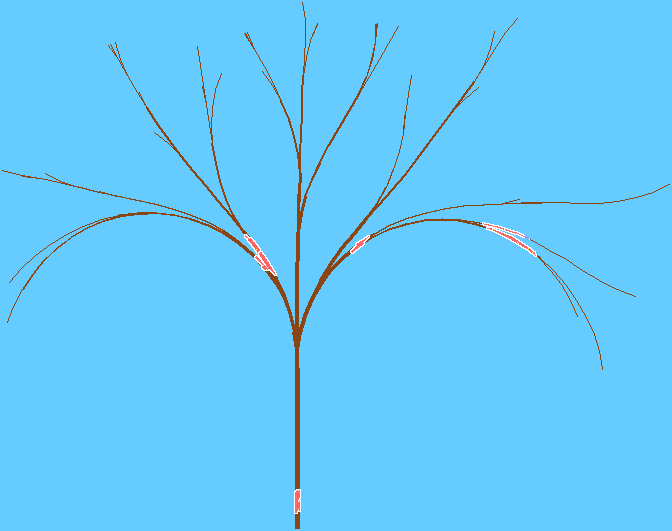

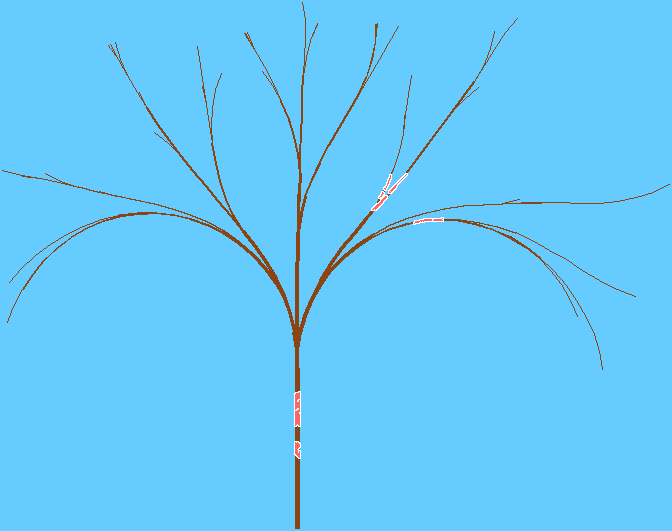

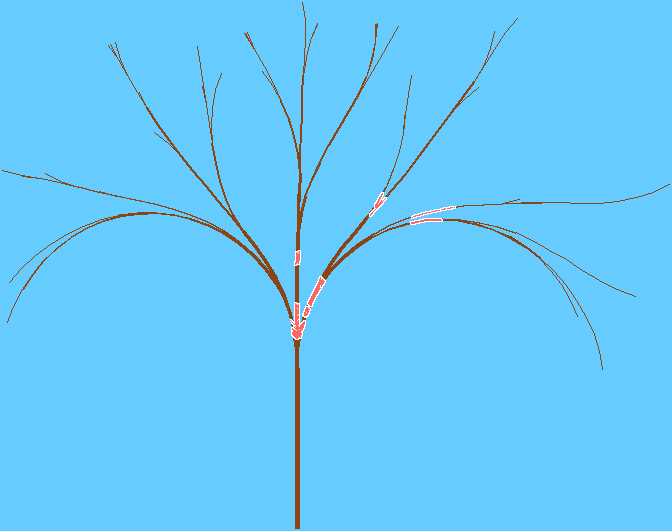

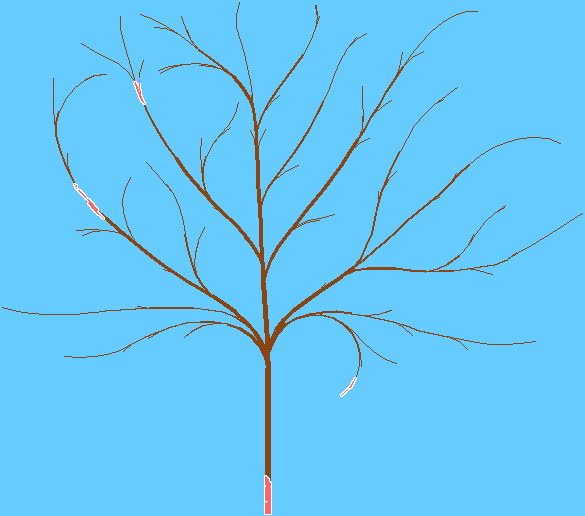

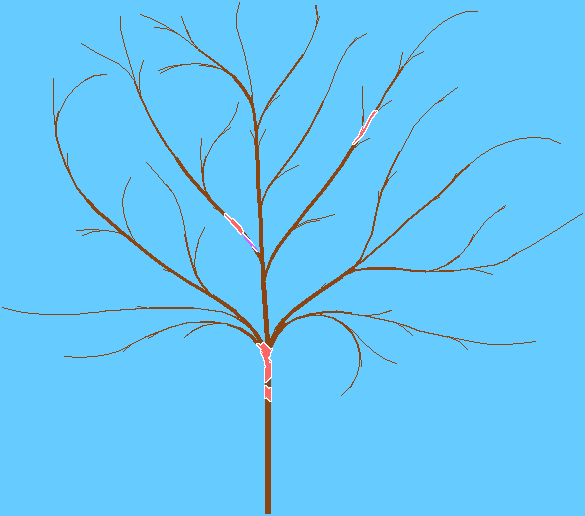

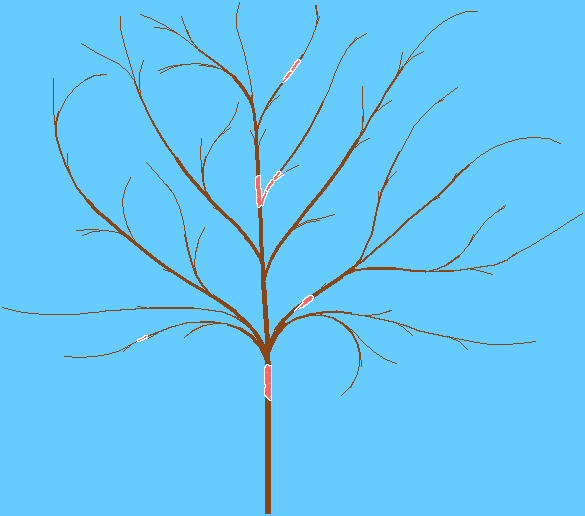

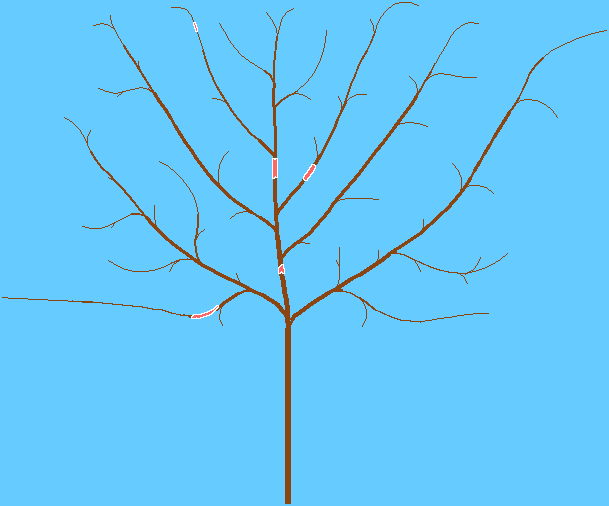

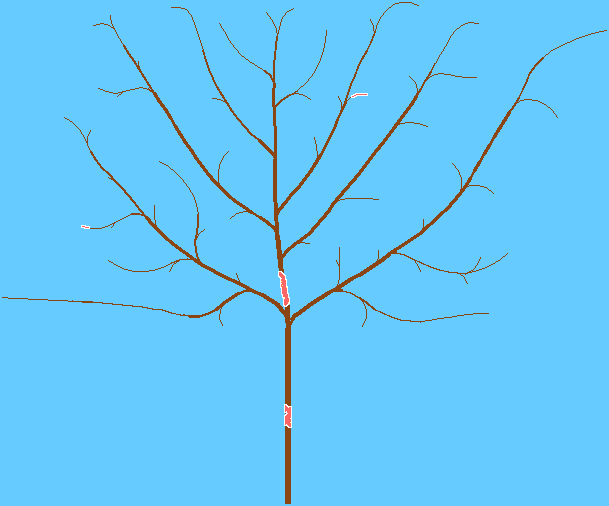

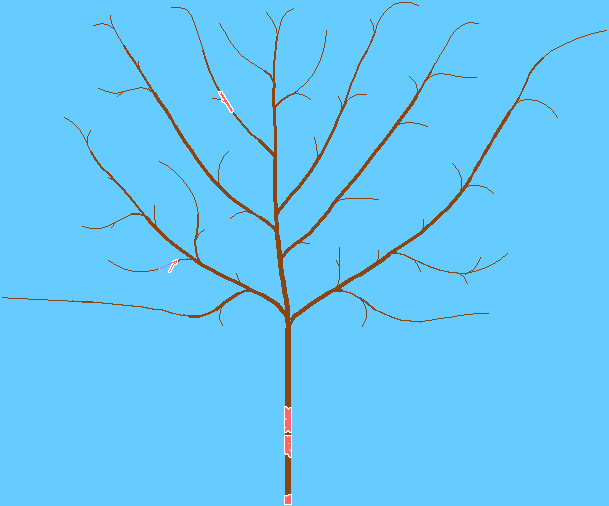

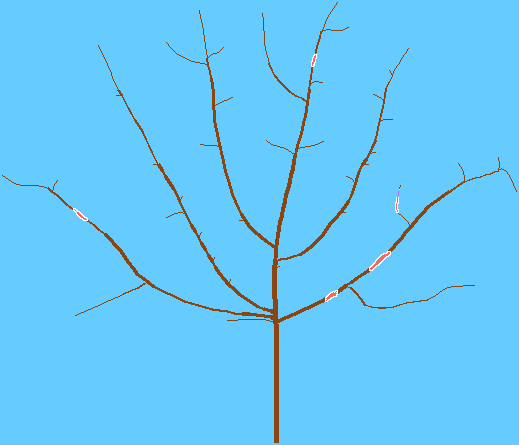

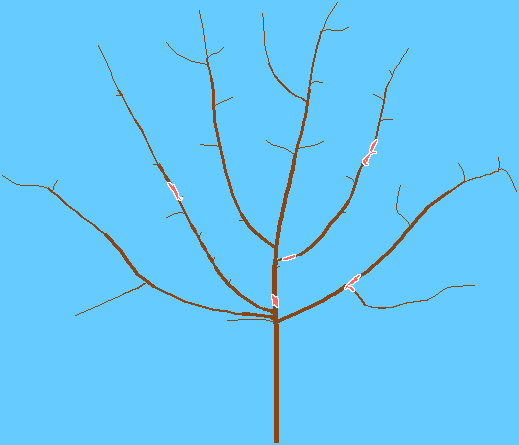

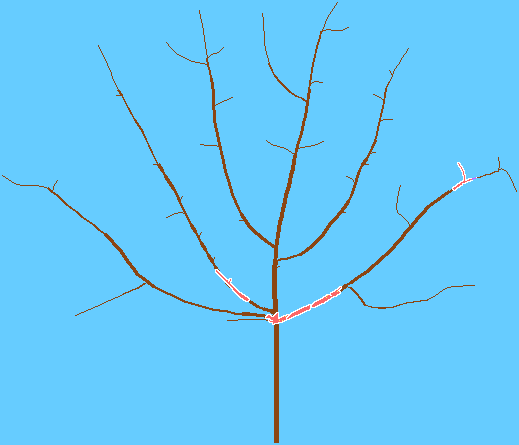

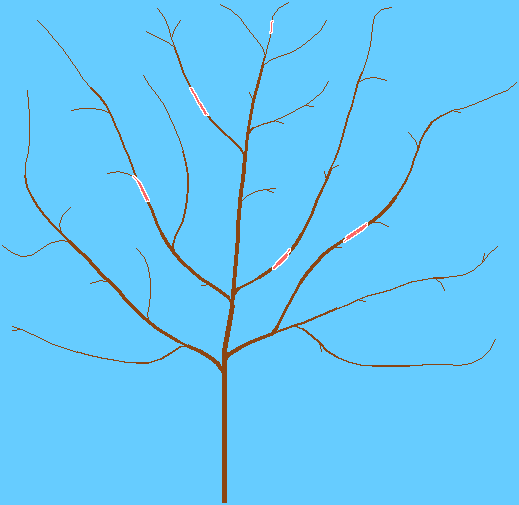

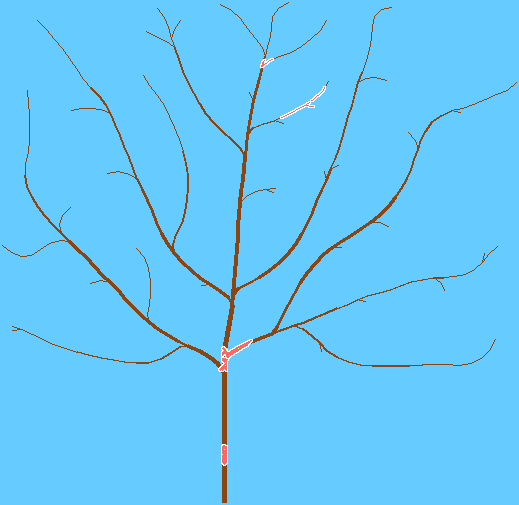

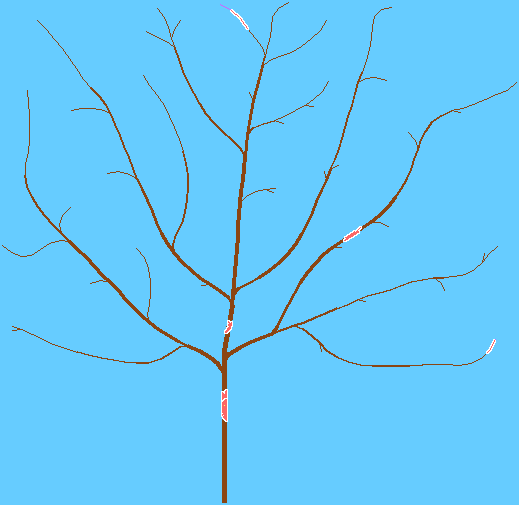

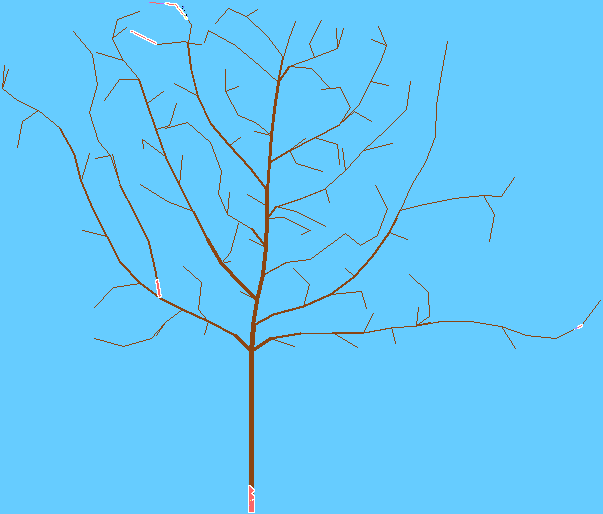

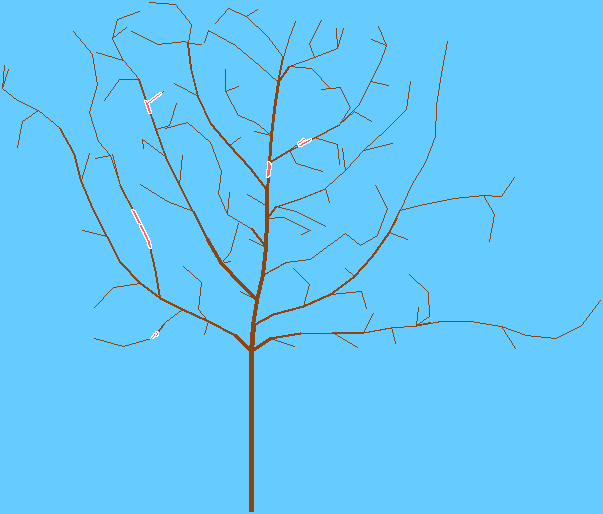

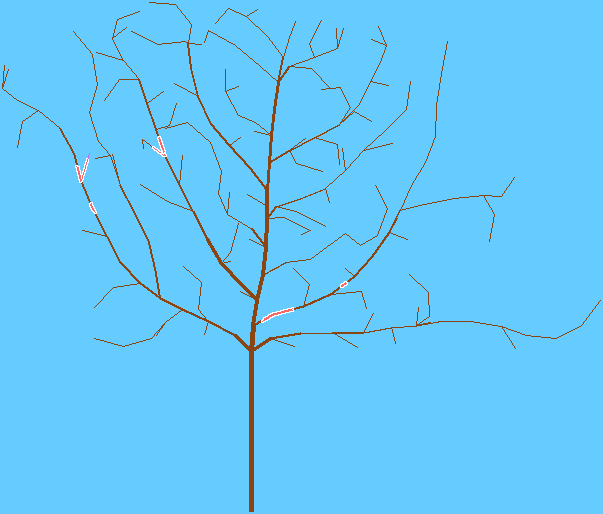

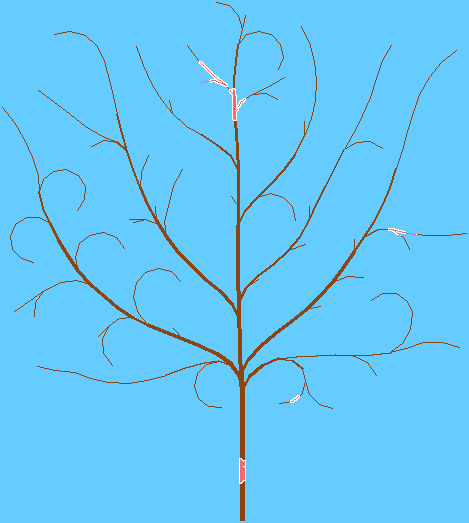

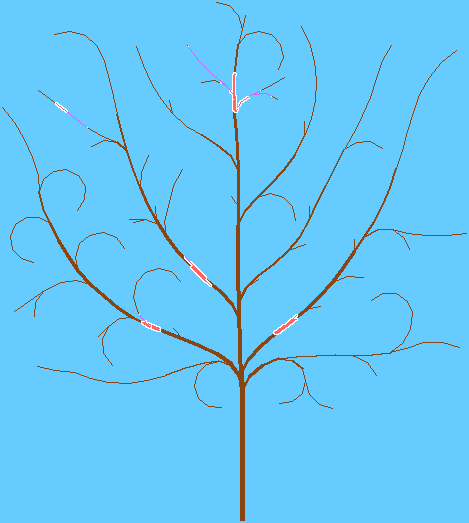

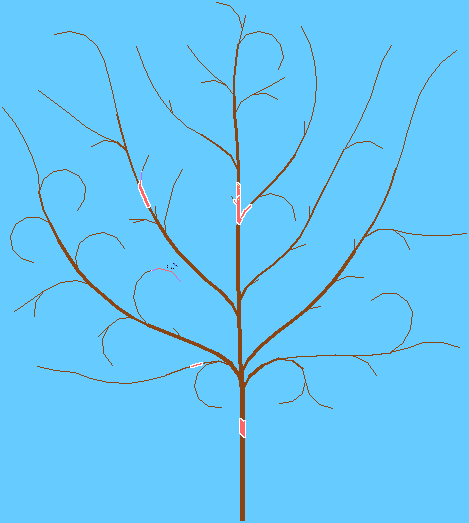

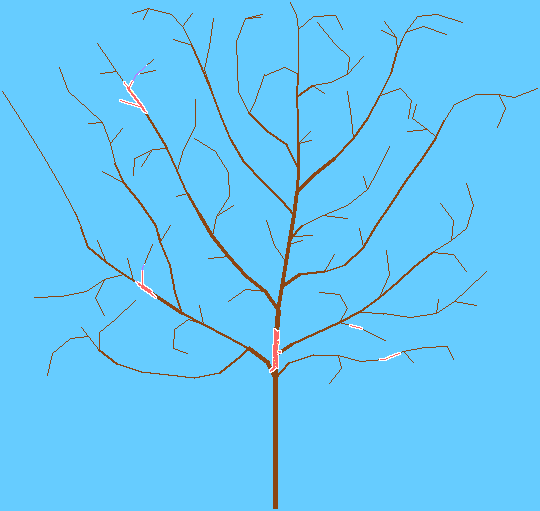

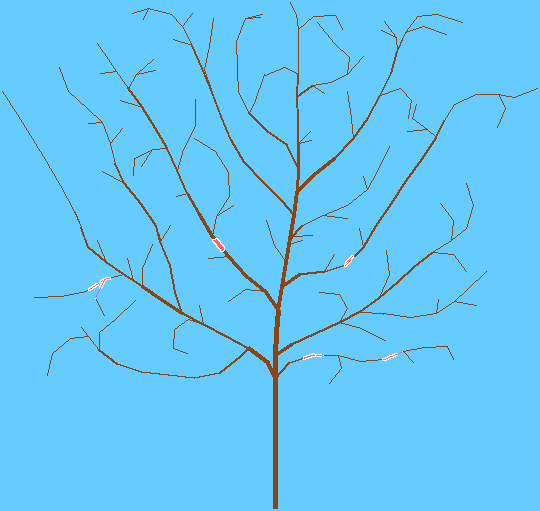

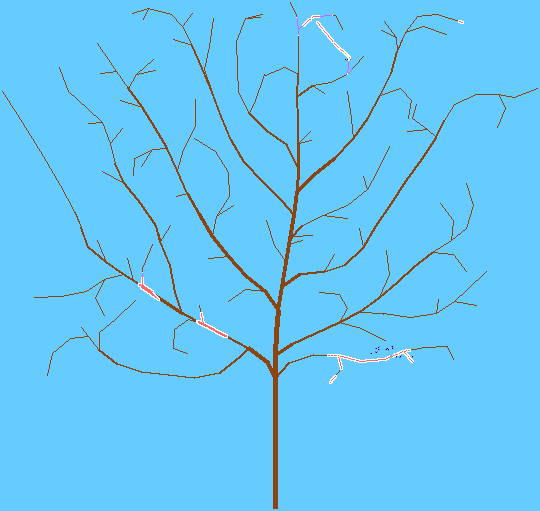

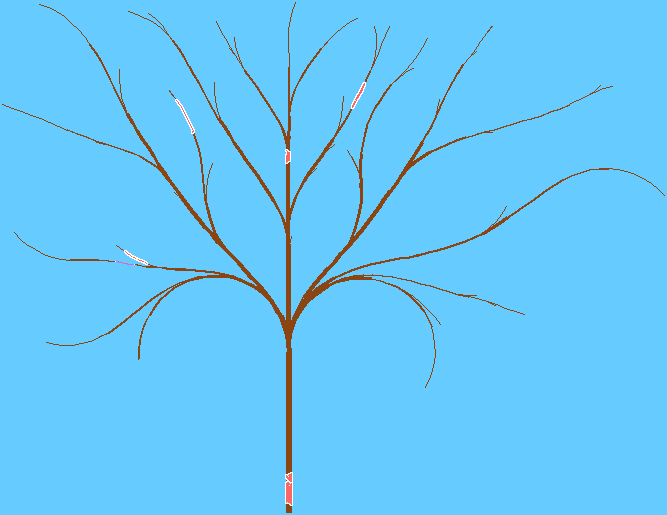

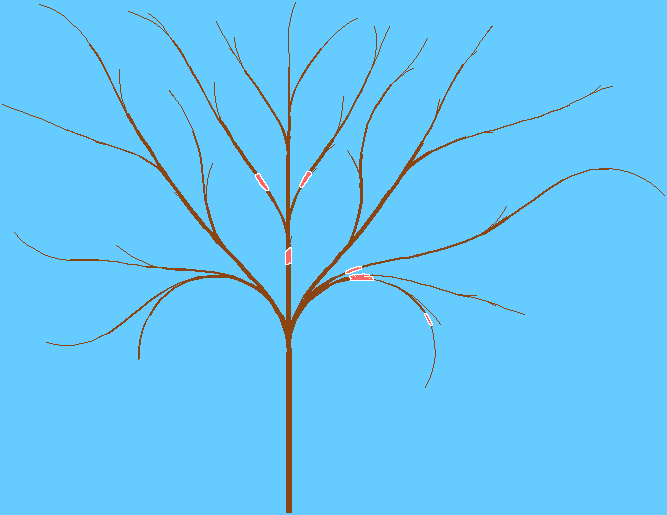

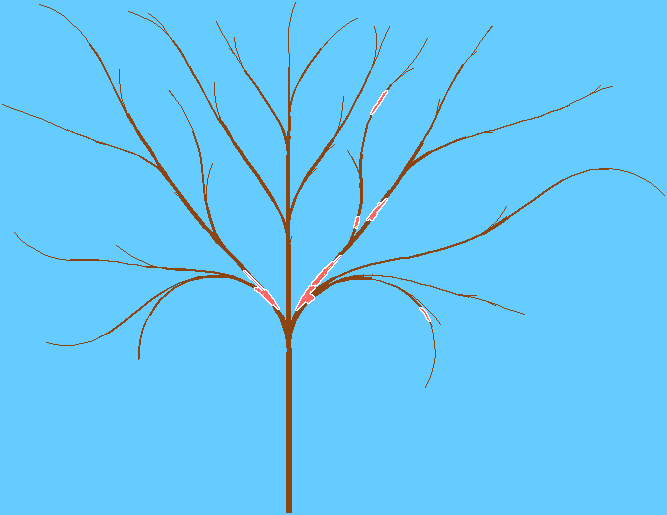

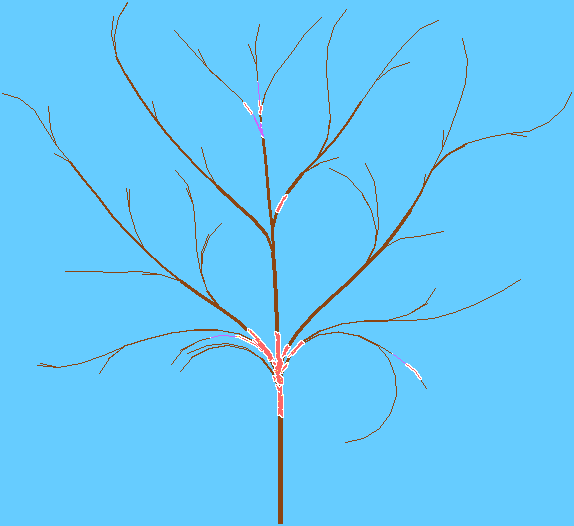

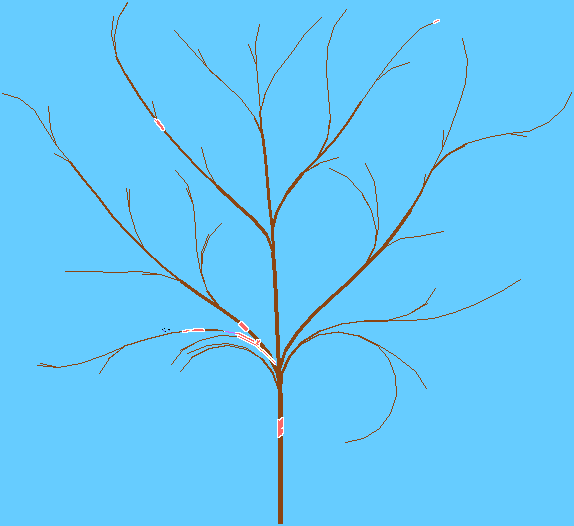

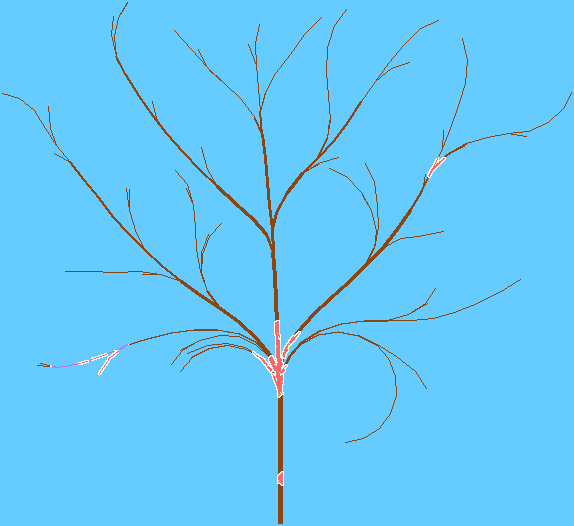

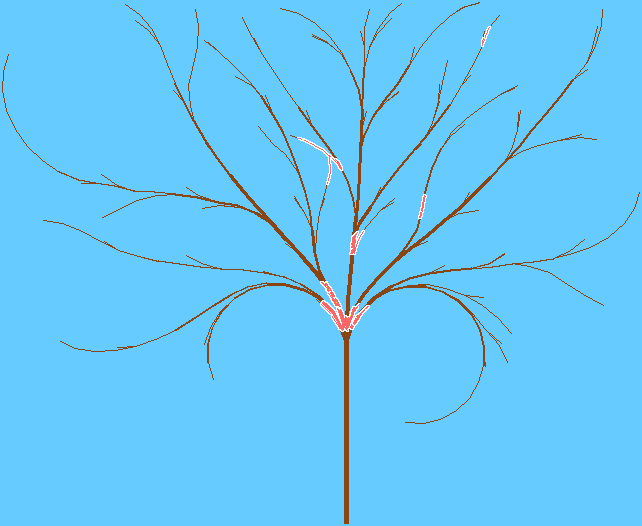

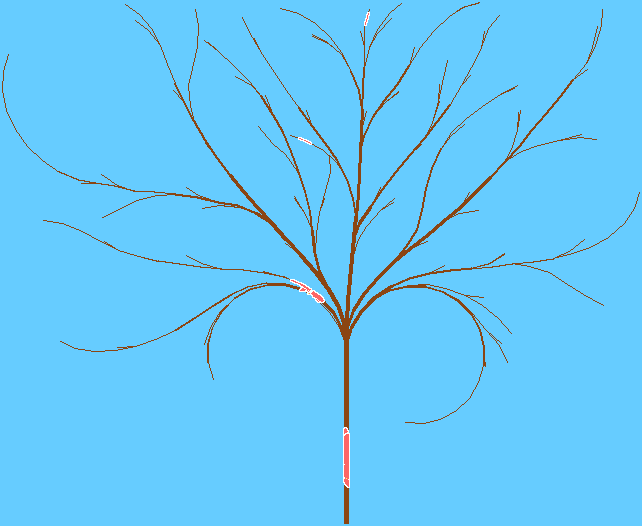

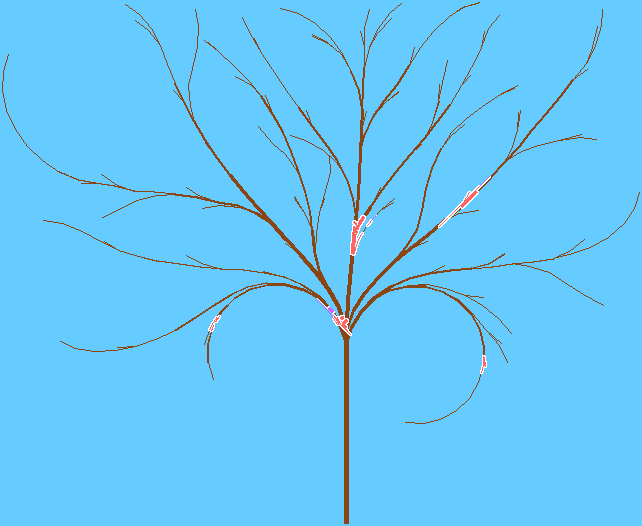

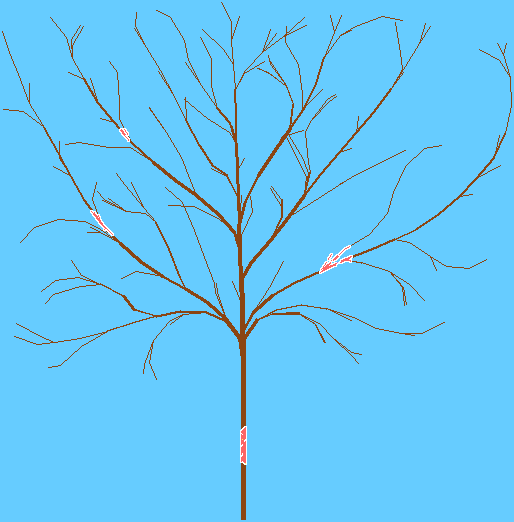

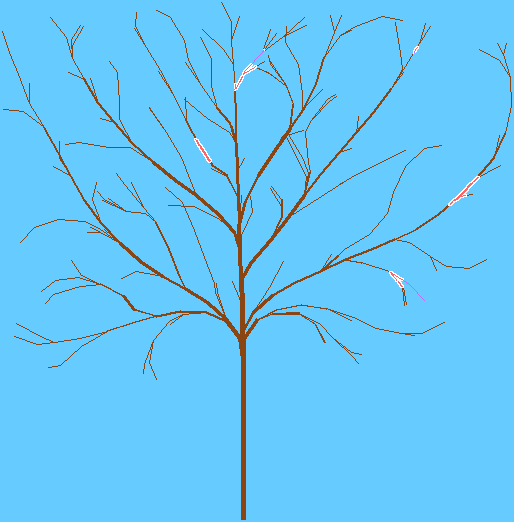

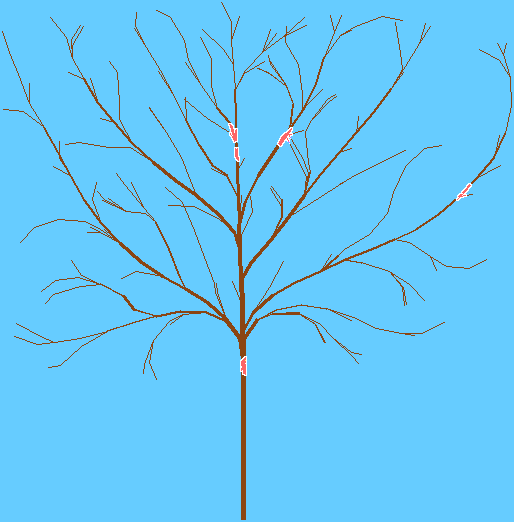

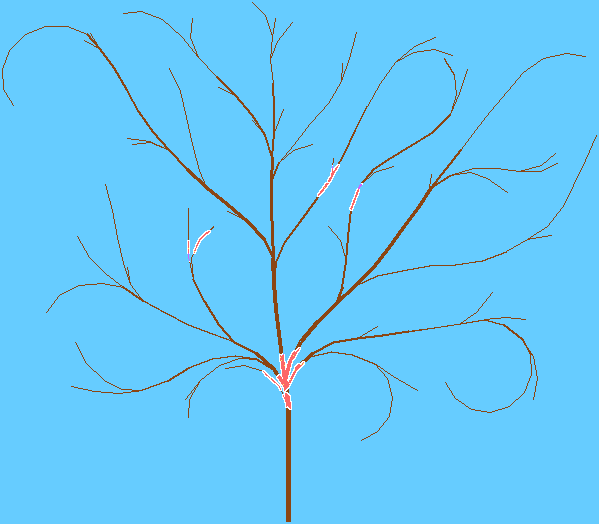

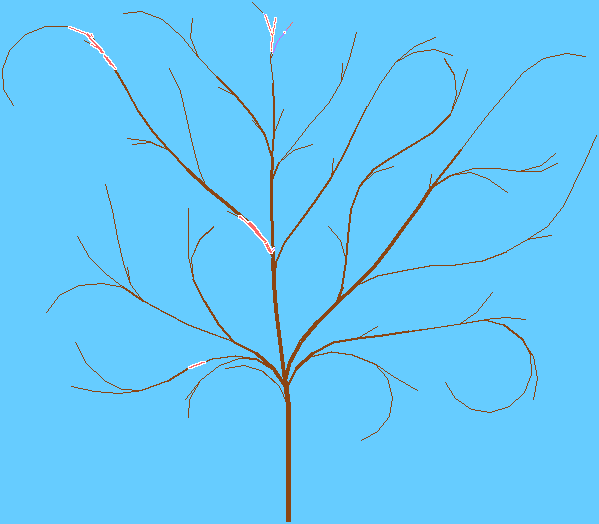

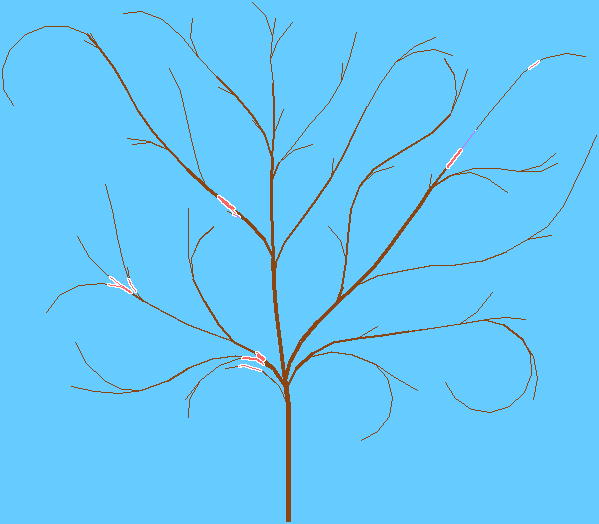

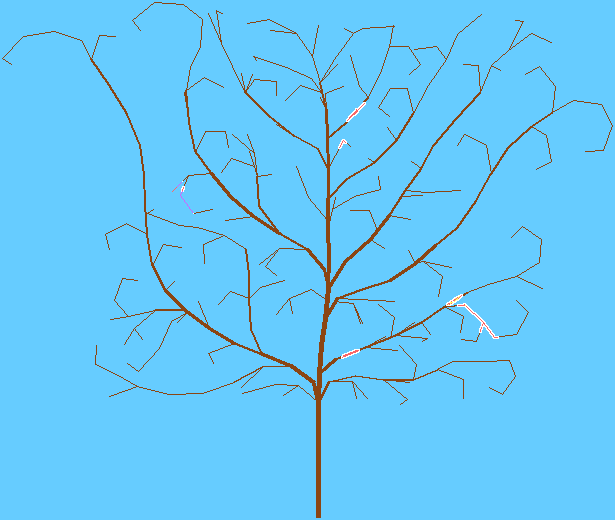

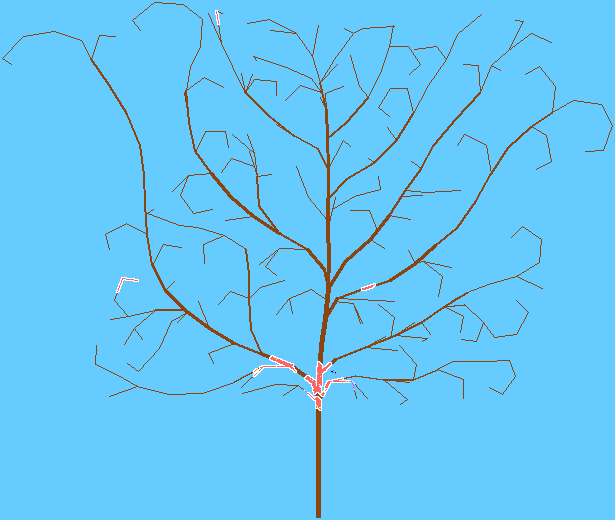

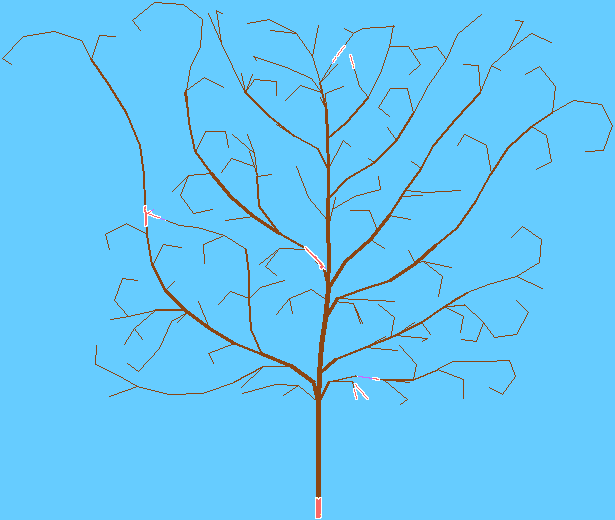

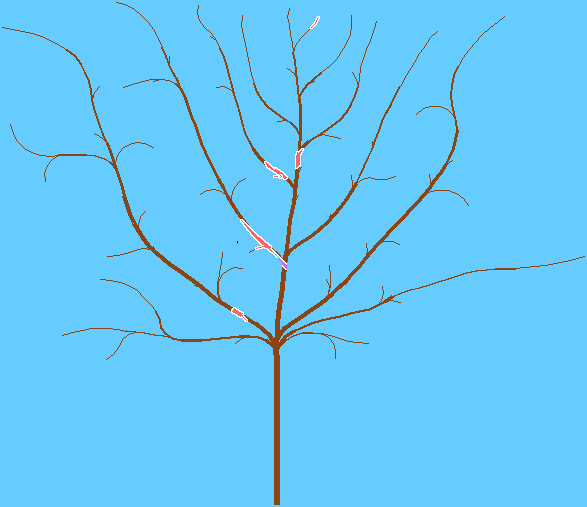

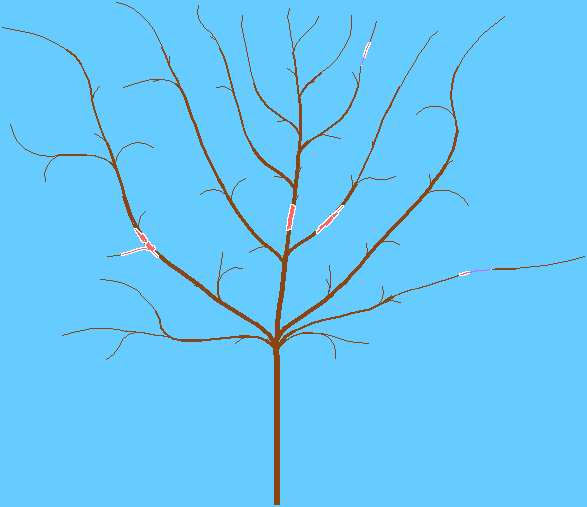

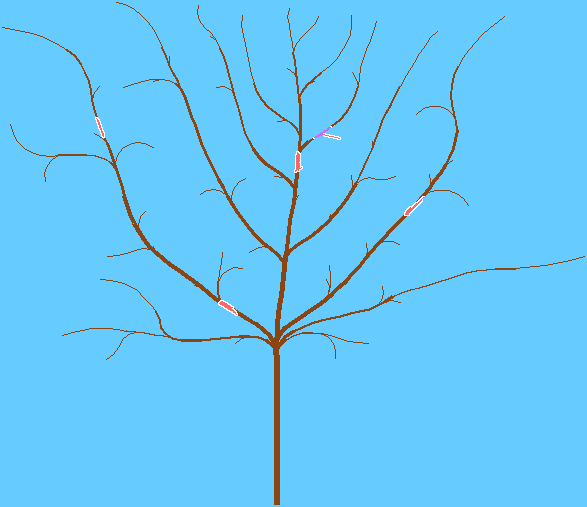

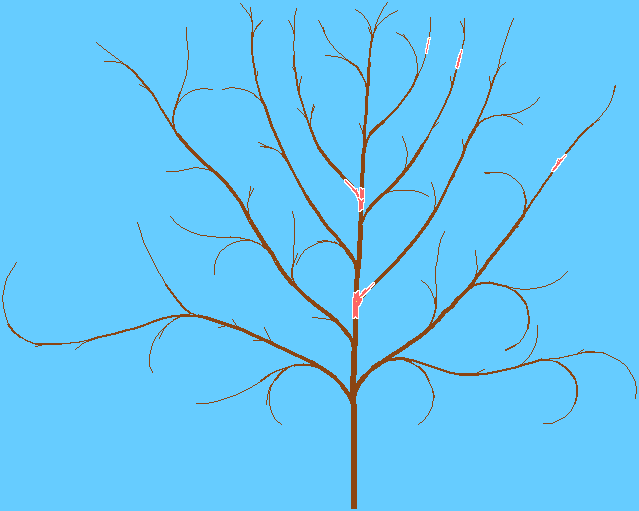

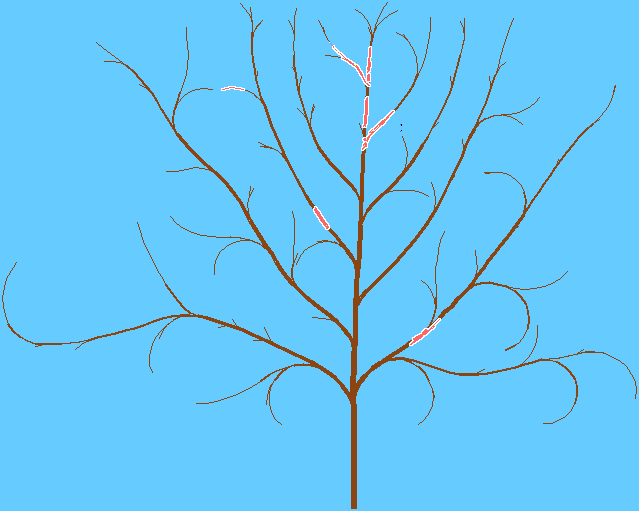

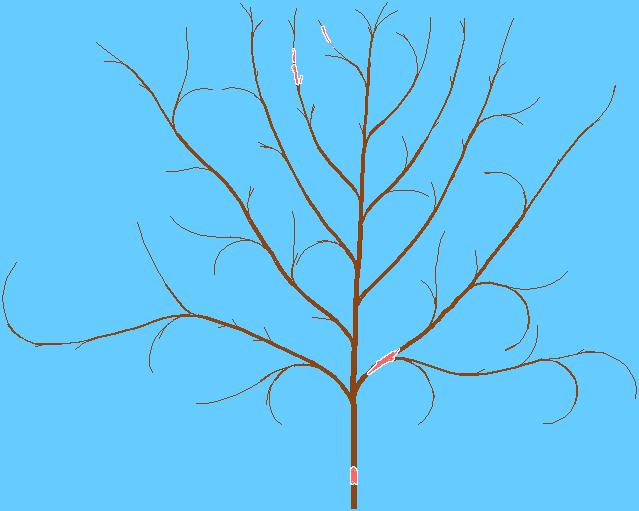

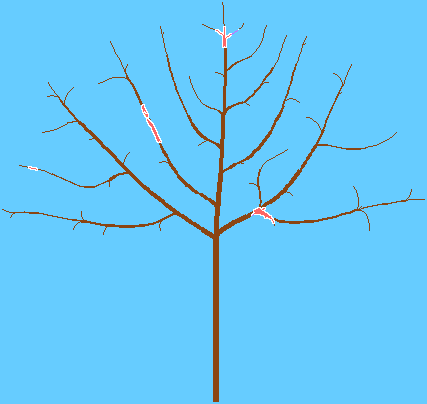

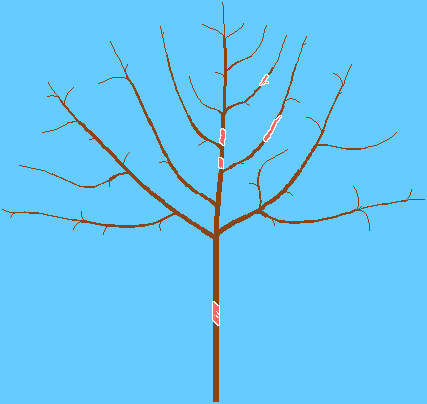

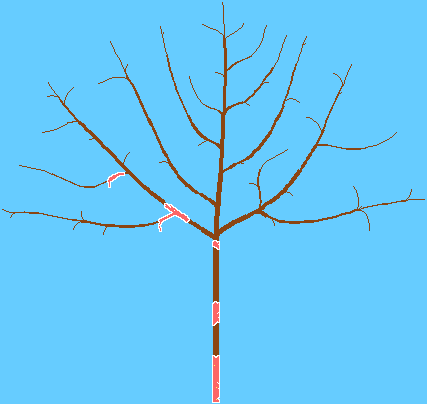

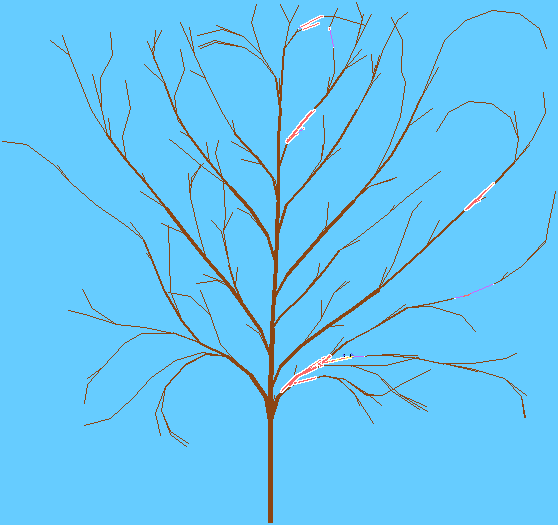

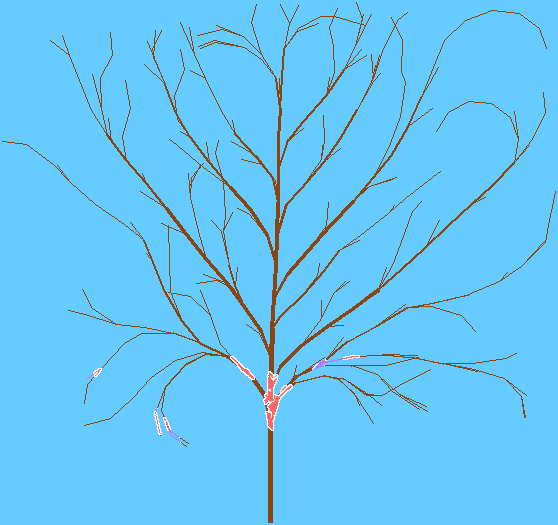

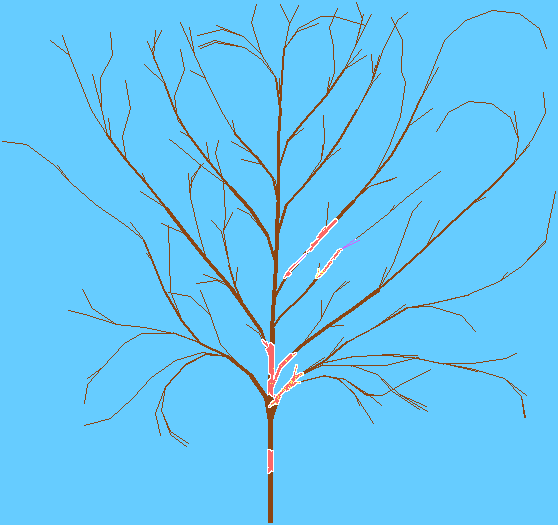

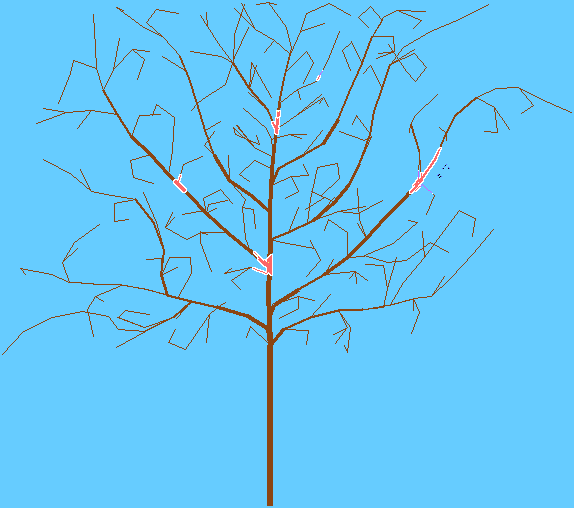

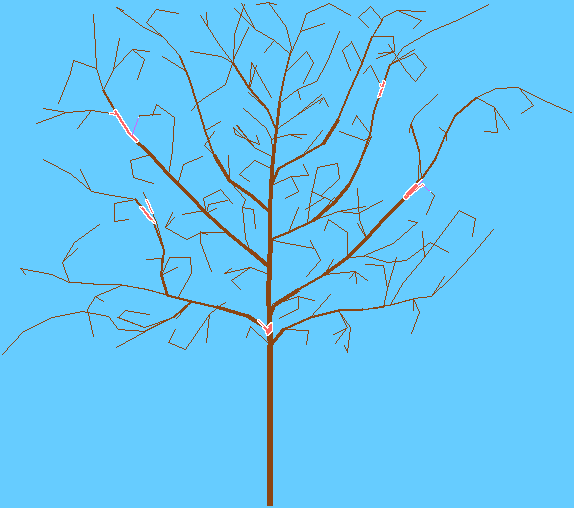

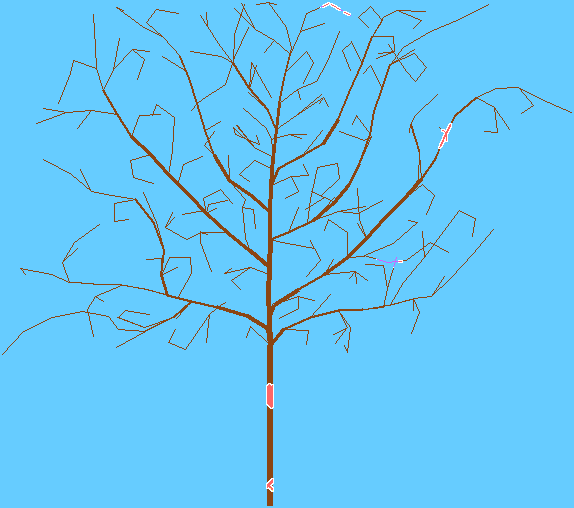

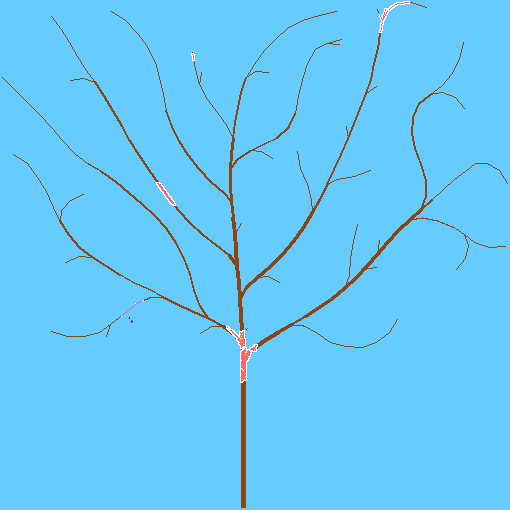

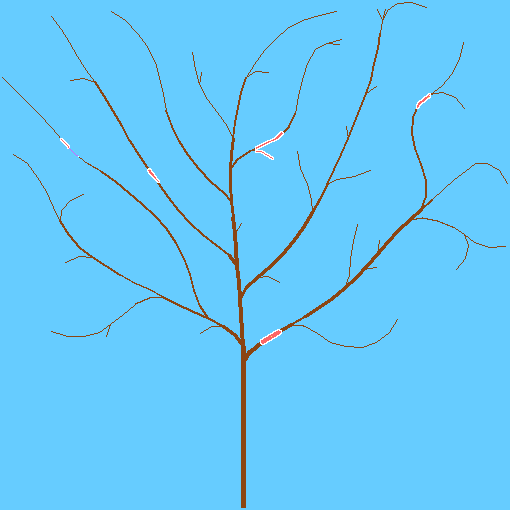

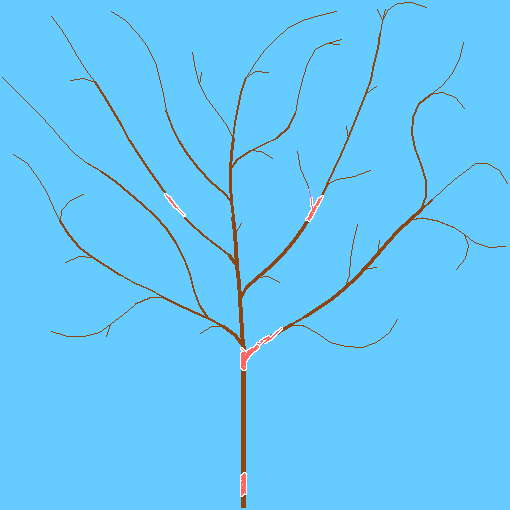

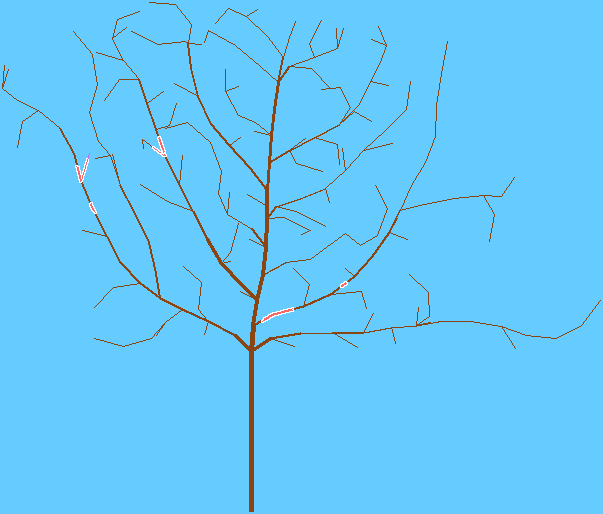

[  0.03    0.4     0.065   0.61    0.32  310.   ]


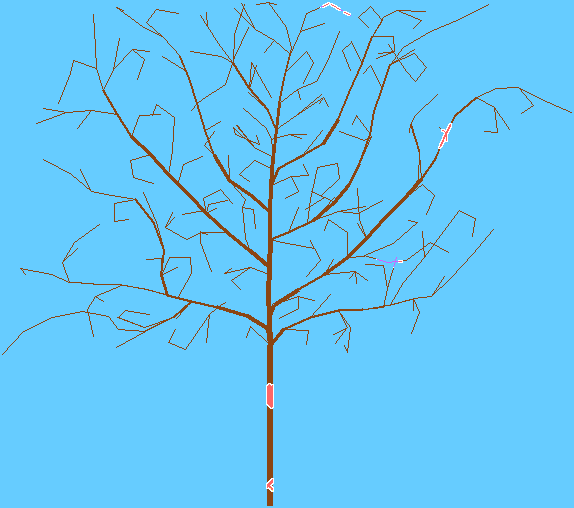

[  0.02    0.35    0.065   0.61    0.32  355.   ]


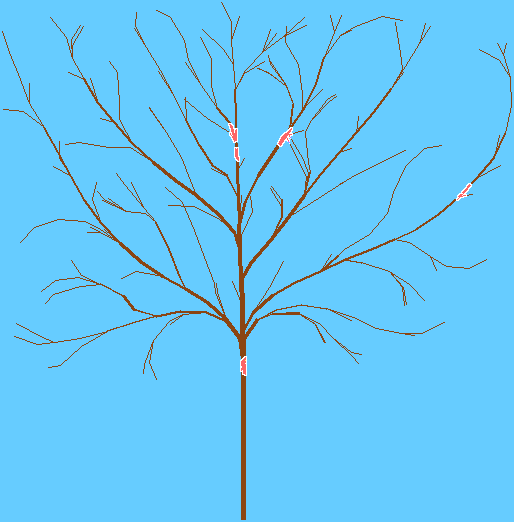

[  0.02   0.35   0.06   0.36   0.32 310.  ]


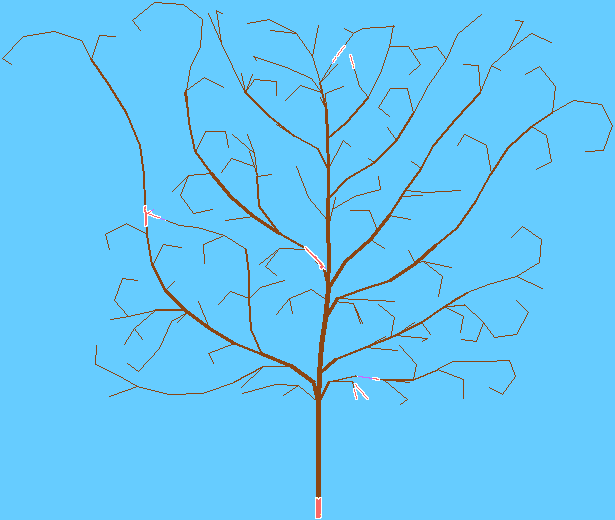

[  0.03   0.4    0.07   0.56   0.23 340.  ]


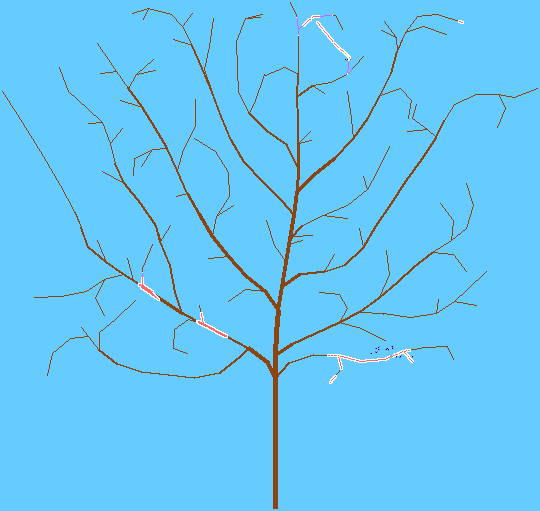

[  0.03    0.35    0.055   0.56    0.26  340.   ]


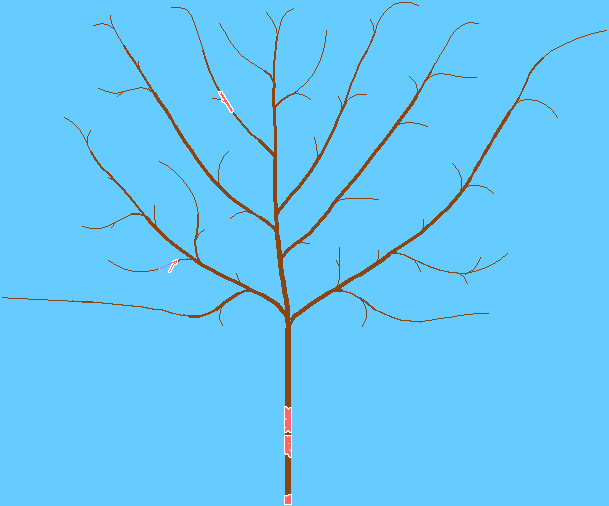

[  0.04   0.3    0.02   0.31   0.35 385.  ]


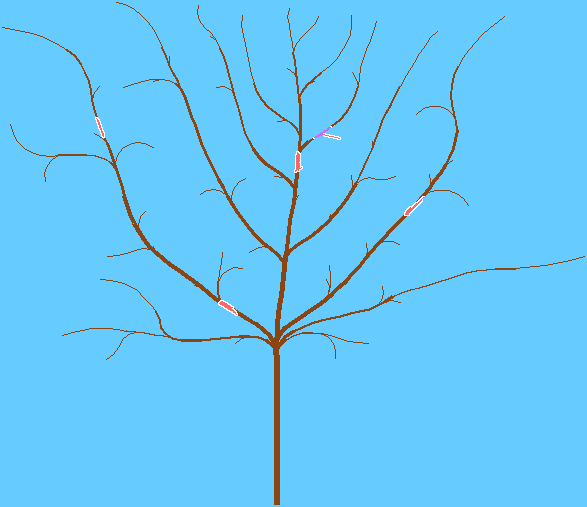

[  0.035   0.25    0.02    0.31    0.29  370.   ]


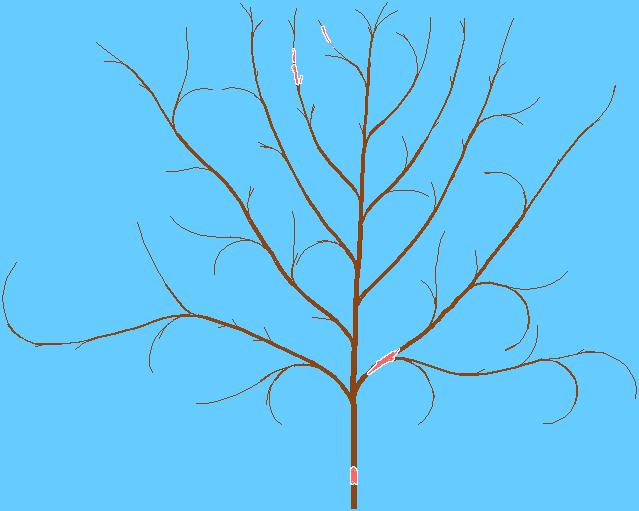

[  0.025   0.25    0.02    0.21    0.2   355.   ]


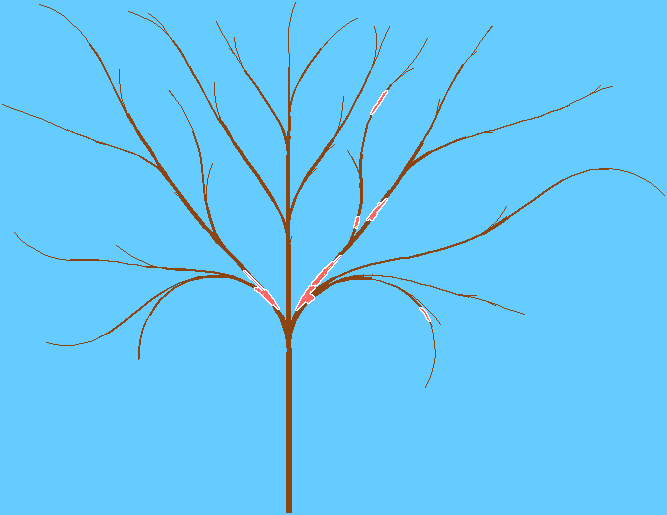

[  0.03   0.45   0.02   0.11   0.32 385.  ]


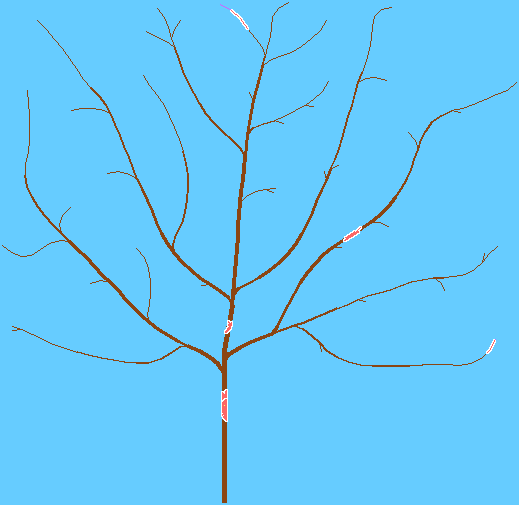

[  0.045   0.25    0.025   0.41    0.26  340.   ]


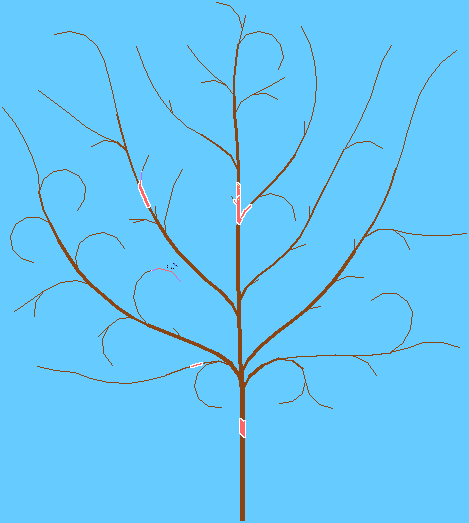

[  0.045   0.35    0.04    0.36    0.26  340.   ]


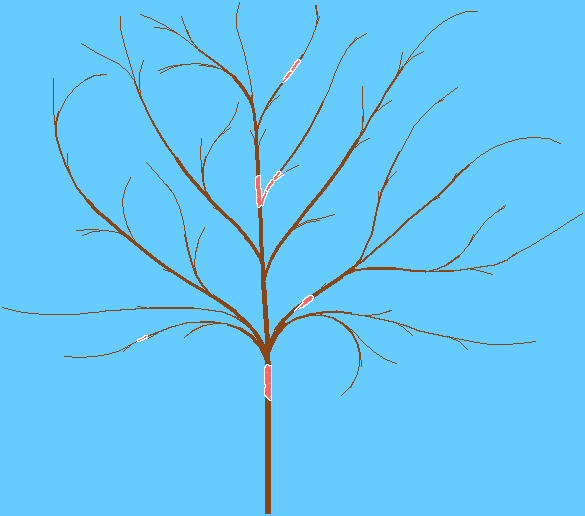

[  0.03   0.35   0.03   0.21   0.29 370.  ]


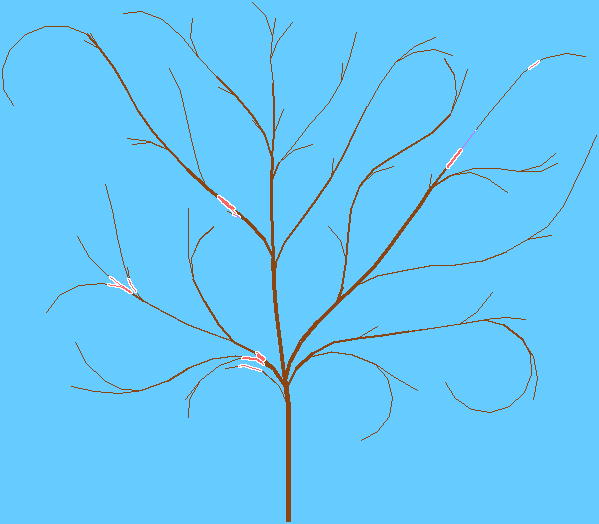

[  0.045   0.25    0.055   0.31    0.23  340.   ]


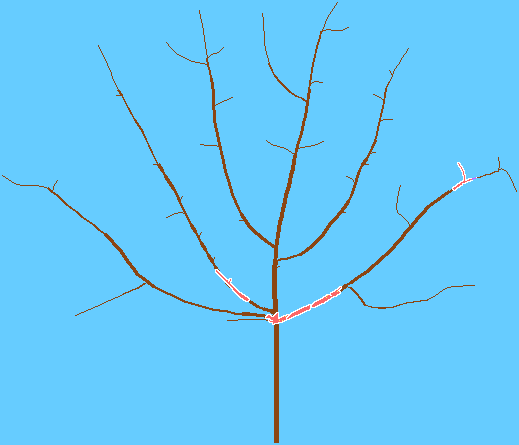

[  0.045   0.3     0.015   0.61    0.23  340.   ]


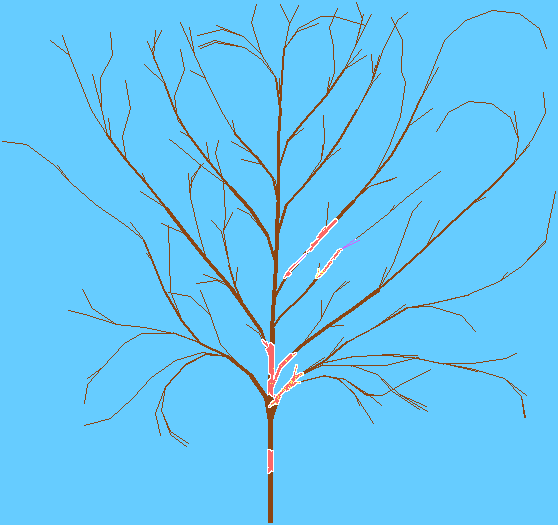

[  0.02   0.4    0.07   0.36   0.2  370.  ]


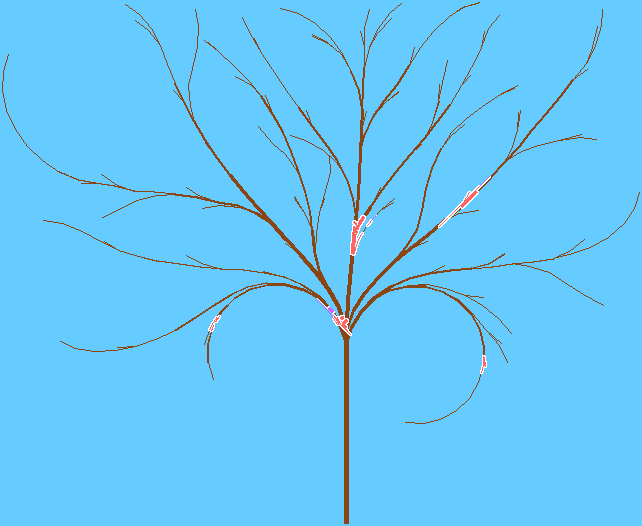

[  0.02    0.35    0.045   0.21    0.32  340.   ]


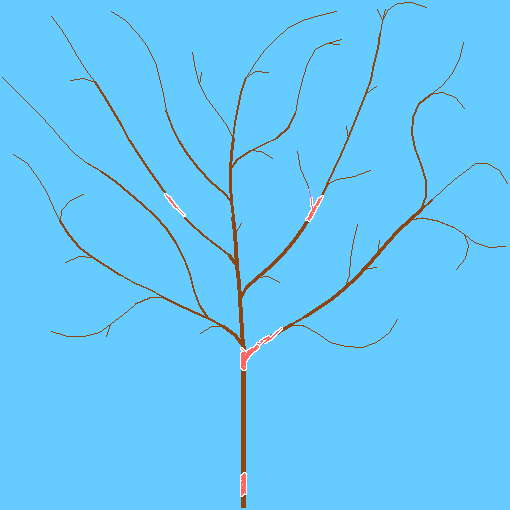

[  0.045   0.4     0.035   0.41    0.29  310.   ]


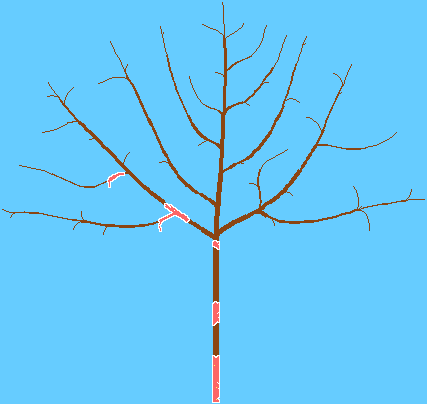

[  0.02   0.4    0.01   0.36   0.32 340.  ]


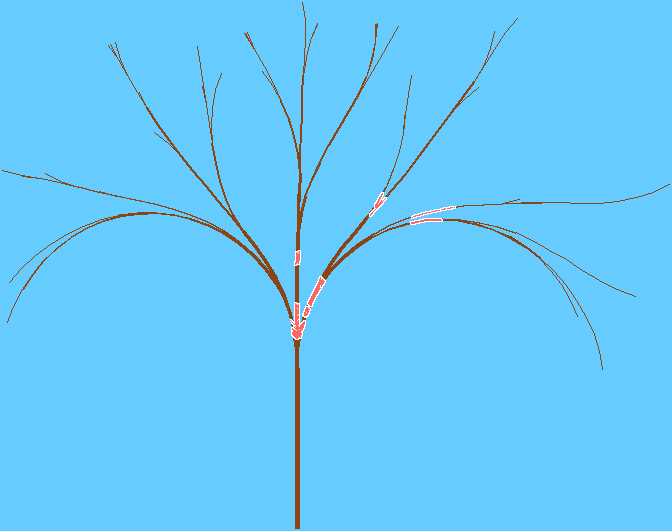

[  0.045   0.4     0.04    0.11    0.32  355.   ]


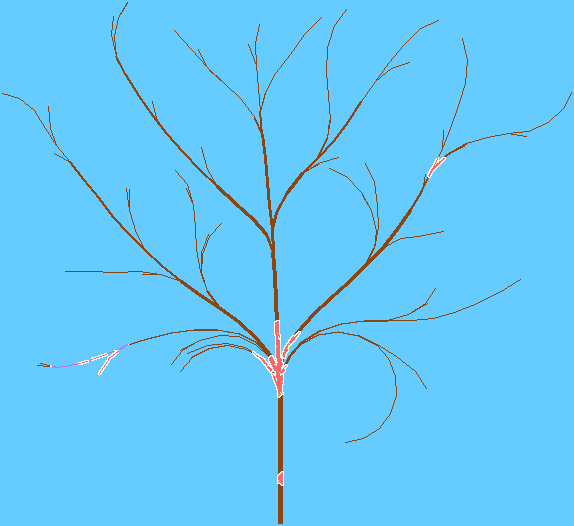

[  0.045   0.4     0.05    0.26    0.26  325.   ]


In [ ]:
def scoreTrees(trees, tree_params, num_infection_sites = 5, trials = 3, steps = 100):
  """
  :param trees: numpy array of 2D grids representing trees
  :param steps: number of simulation steps each model is ran for
  :returns: scoredTreeModels sorted list of tuples of score and associated tree model
  :returns: minTreeModel tree model with the lowest score
  :returns: maxTreeModel tree model with the highest score
  """
  # 100 steps takes roughly 1.25 minutes
  totalTime = len(trees) * trials * steps * 1.25 / 100
  print(f"This simulation will take around {totalTime} minutes or {totalTime / 60} hours")
  # find the tree with the best score
  # also get the tree with the worst score
  minTreeModel = None
  minScore = None
  maxTreeModel = None
  maxScore = None
  scoredTreeModels = []
  treeNum = 0
  for i in range(len(trees)):
    tree = trees[i]
    params = tree_params[i]
    model = None
    totalScores = 0
    for trial in range(trials):
      model = ImmuneResponseCA(tree, num_infection_sites=num_infection_sites)
      for k in range(steps):
        model.step()
      score = model.percentDeadOrInfected()
      totalScores += score
      
      path = f"simulation/tree{treeNum}trial{trial}step{steps}.png"
      model.visualize(path)

    averageScore = totalScores / trials
    # print(score)
    scoredTreeModels.append((averageScore, model, params))
    if minTreeModel is None or averageScore < minScore:
      minTreeModel = model
      minScore = averageScore
    if maxTreeModel is None or averageScore > maxScore:
      maxTreeModel = model
      maxScore = averageScore
    # print(model)
    treeNum += 1
  scoredTreeModels = sorted(scoredTreeModels, key=lambda tup: tup[0])
  return (scoredTreeModels, minTreeModel, maxTreeModel)

scoredTreeModels, minTreeModel, maxTreeModel = scoreTrees(trees, tree_params, trials = trials, steps = steps)

!rm -rf rankedTrees
!mkdir rankedTrees
# save all scored tree models in order of their score
for score, model, params in scoredTreeModels:
  path = f"rankedTrees/tree{score}.png"
  model.visualize(path)
  print(params)


In [ ]:
generate_gif("rankedTrees/", "results")
!zip -r rankedTrees/images.zip rankedTrees/
generate_gif("simulation/", "intermediateSteps")
!zip -r simulation/images.zip simulation/

  adding: rankedTrees/ (stored 0%)
  adding: rankedTrees/tree0.032079729886696114.png (deflated 6%)
  adding: rankedTrees/tree0.043655843621461354.png (deflated 6%)
  adding: rankedTrees/tree0.061147436032112784.png (deflated 8%)
  adding: rankedTrees/tree0.02968246592897279.png (deflated 4%)
  adding: rankedTrees/tree0.04995472512352539.png (deflated 2%)
  adding: rankedTrees/tree0.05360277169902886.png (deflated 6%)
  adding: rankedTrees/tree0.06551919970001273.png (deflated 10%)
  adding: rankedTrees/tree0.03496936767175204.png (deflated 3%)
  adding: rankedTrees/tree0.023729504951582086.png (deflated 7%)
  adding: rankedTrees/tree0.04546536574992353.png (deflated 4%)
  adding: rankedTrees/tree0.027234033417632142.png (deflated 6%)
  adding: rankedTrees/tree0.04568995081915097.png (deflated 6%)
  adding: rankedTrees/tree0.03246205732328995.png (deflated 6%)
  adding: rankedTrees/tree0.026839120509288068.png (deflated 5%)
  adding: rankedTrees/tree0.03736436472260168.png (deflated 6%

In [ ]:
# print(scoredTreeModels)
for averageScore, treeModel, params in scoredTreeModels:
  # print(f"{averageScore}, {np.round(params, 5).tolist()}")
  print(treeModel.state.shape)
# !zip -r trees/images.zip trees/

(514, 603)
(508, 574)
(522, 514)
(520, 615)
(511, 540)
(506, 609)
(507, 587)
(511, 639)
(515, 667)
(505, 519)
(523, 469)
(516, 585)
(524, 599)
(445, 519)
(525, 558)
(526, 642)
(510, 510)
(404, 427)
(531, 672)
(526, 574)


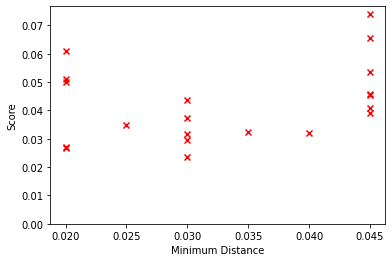

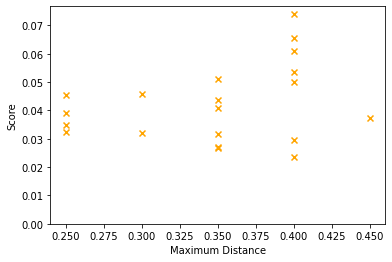

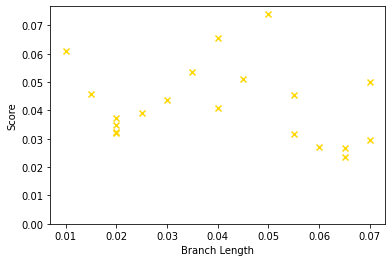

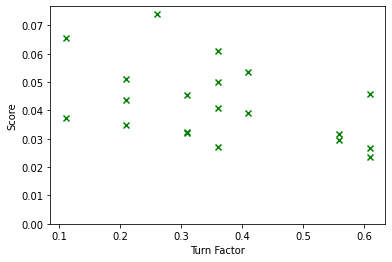

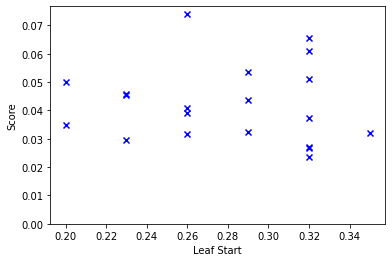

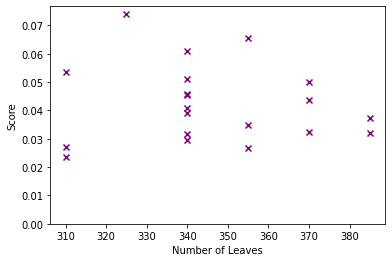

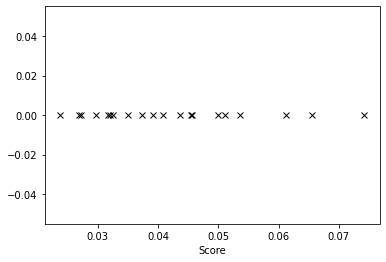

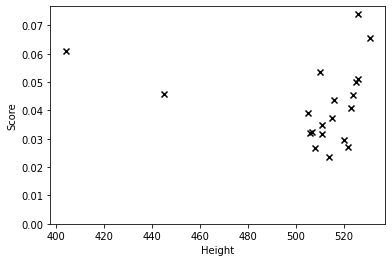

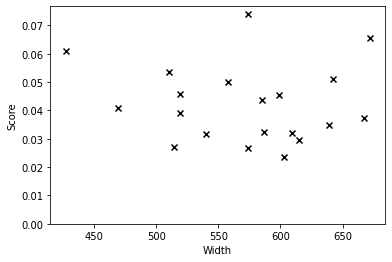

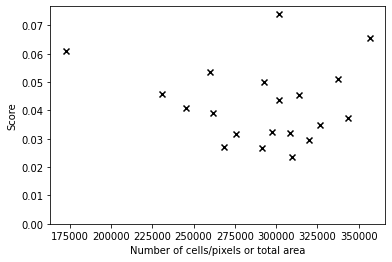

In [ ]:
scores = []
min_distances = []
max_distances = []
branch_length = []
turn_factor = []
leaf_start = []
number_of_leaves = []

heights = []
widths = []
areas = []

for score, model, params in scoredTreeModels:
  scores.append(score)
  min_distances.append(params[0])
  max_distances.append(params[1])
  branch_length.append(params[2])
  turn_factor.append(params[3])
  leaf_start.append(params[4])
  number_of_leaves.append(params[5])
  height, width = model.state.shape
  area = height * width
  heights.append(height)
  widths.append(width)
  areas.append(area)
  

plt.scatter(min_distances, scores, marker="x", color='red')
plt.xlabel('Minimum Distance')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(max_distances, scores, marker="x", color='orange')
plt.xlabel('Maximum Distance')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(branch_length, scores, marker="x", color='gold')
plt.xlabel('Branch Length')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(turn_factor, scores, marker="x", color='green')
plt.xlabel('Turn Factor')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(leaf_start, scores, marker="x", color='blue')
plt.xlabel('Leaf Start')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(number_of_leaves, scores, marker="x", color='purple')
plt.xlabel('Number of Leaves')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.plot(scores, np.zeros_like(scores), 'x', color='black')
plt.xlabel('Score')
plt.show()
print('\n')

plt.scatter(heights, scores, marker="x", color='black')
plt.xlabel('Height')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(widths, scores, marker="x", color='black')
plt.xlabel('Width')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

plt.scatter(areas, scores, marker="x", color='black')
plt.xlabel('Number of cells/pixels or total area')
plt.ylabel('Score')
plt.ylim(ymin=0)
plt.show()
print('\n')

## Additional Anaylsis and Research

### Forest Analysis
This will take way too long to run and is not practical because of it.

In [ ]:
def generateForestFromTree(tree, count = 5, padding = 0):
  """
  :param tree: 2D numpy array representing the tree to be repeated
  :param count: the number of times the tree is repeated
  :param padding: the spacing between the trees
  :returns: a 2D numpy array of the given tree repeated the given number of times
  """
  leftPadding = 0
  rightPadding = padding
  paddedTree =  np.pad(tree, ((0,0),(leftPadding,rightPadding)), 'constant')
  forest = np.hstack([paddedTree] * count)
  # print(forest)
  return forest

def generateForestsFromTrees(trees, count = 5, padding = 0):
  """
  :param tree: a numpy array of 2D numpy array representing trees to be repeated
  :param count: the number of times the tree is repeated
  :param padding: the spacing between the trees
  :returns: an array of 2D numpy array of the given tree repeated the given number of times
  """
  forests = []
  for tree in trees:
    forest = generateForestFromTree(tree, count, padding)
    forests.append(forest)

  return np.array(forests)

In [ ]:
forests = generateForestsFromTrees(trees, count = 2, padding = 0)

"""scoredTreeModels, minTreeModel, maxTreeModel = scoreTrees(forests, steps = 5)
# print(scoredTreeModels)
print(minTreeModel)
print('\n')
print(maxTreeModel)"""

"scoredTreeModels, minTreeModel, maxTreeModel = scoreTrees(forests, steps = 5)\n# print(scoredTreeModels)\nprint(minTreeModel)\nprint('\n')\nprint(maxTreeModel)"